In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.14.3


In [3]:
import cufflinks as cf

init_notebook_mode(connected=True)

cf.go_offline()

## Sneak Peak into the data

In [4]:
data = pd.read_csv('train-data.csv',usecols = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price'])

In [5]:
data.head(15)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


## Data Cleaning

In [6]:
data['Engine'] = data.Engine.str.split(' ',expand = True)
data['Power'] = data.Power.str.split(' ',expand = True)
data['Mileage'] = data.Mileage.str.split(' ',expand = True)

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


In [7]:
data['Make'] = data.Name.apply(lambda x: x.split(' ')[0])
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74,Audi


In [8]:
data.columns = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','New Price', 'Price', 'Make']

In [9]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New Price,Price,Make
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74,Audi


## Dealing with missing values

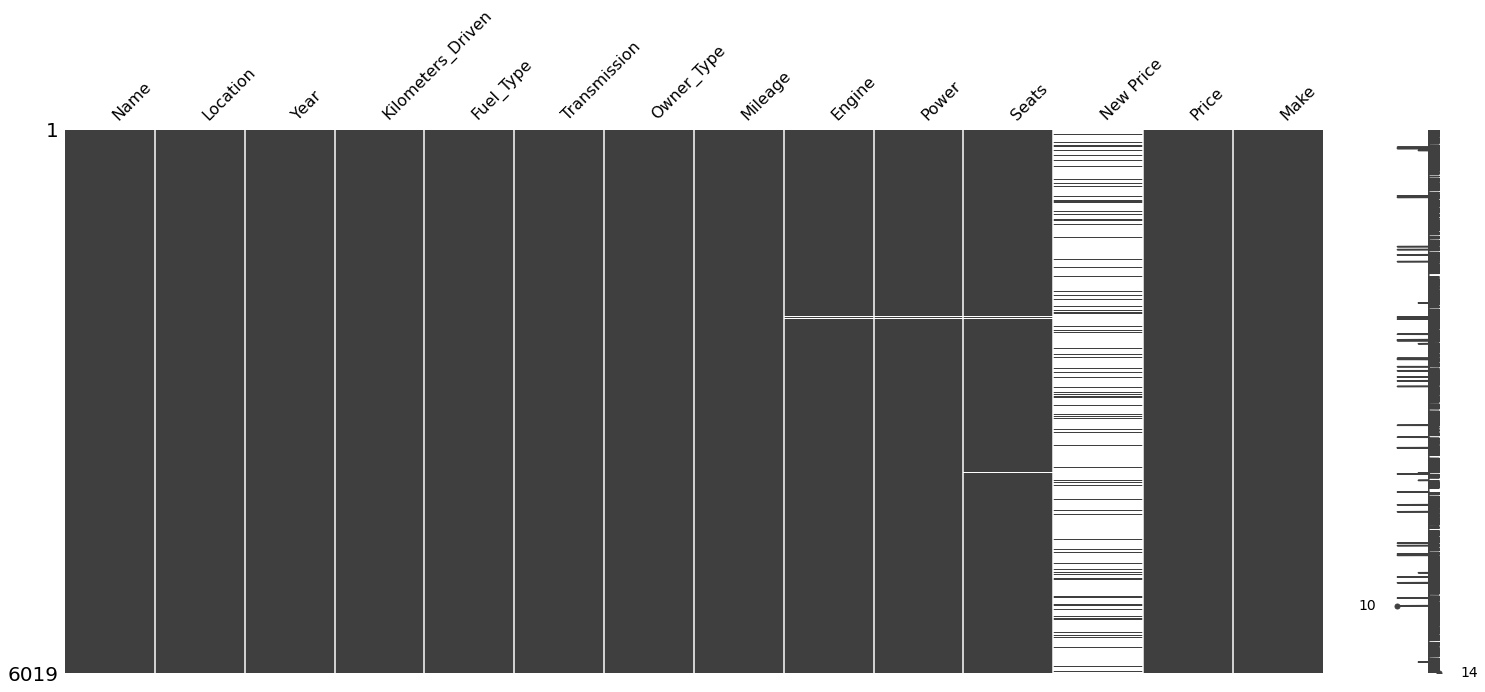

In [10]:
msno.matrix(data)

In [11]:
data.drop(columns='New Price', inplace = True)

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Make               6019 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [13]:
data['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [14]:
data['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [15]:
data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [16]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [17]:
data['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [18]:
data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [19]:
data['Make'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [20]:
data[data['Make']=='ISUZU']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make
3624,ISUZU D-MAX V-Cross 4X4,Coimbatore,2018,20422,Diesel,Manual,First,12.4,2499,134,5.0,16.09,ISUZU
5979,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,25000,Diesel,Manual,First,12.4,2499,134,5.0,8.00,ISUZU


In [21]:
data['Make'] = data['Make'].str.replace('SUZU','suzu')

In [22]:
data[data['Make']=='ISUZU']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make


In [23]:
data['Make'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [24]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Seats,42,0.006978
Power,36,0.005981
Engine,36,0.005981
Mileage,2,0.000332
Make,0,0.000000
Price,0,0.000000
Owner_Type,0,0.000000
Transmission,0,0.000000
Fuel_Type,0,0.000000
Kilometers_Driven,0,0.000000


In [25]:
data['Power'] = data['Power'].replace('null', np.NaN)
data['Mileage'] = data['Mileage'].replace('0.0', np.NaN)

In [26]:
data['Mileage'] = data['Mileage'].astype('float')
data['Engine'] = data['Engine'].astype('float')
data['Power'] = data['Power'].astype('float')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            5949 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Make               6019 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


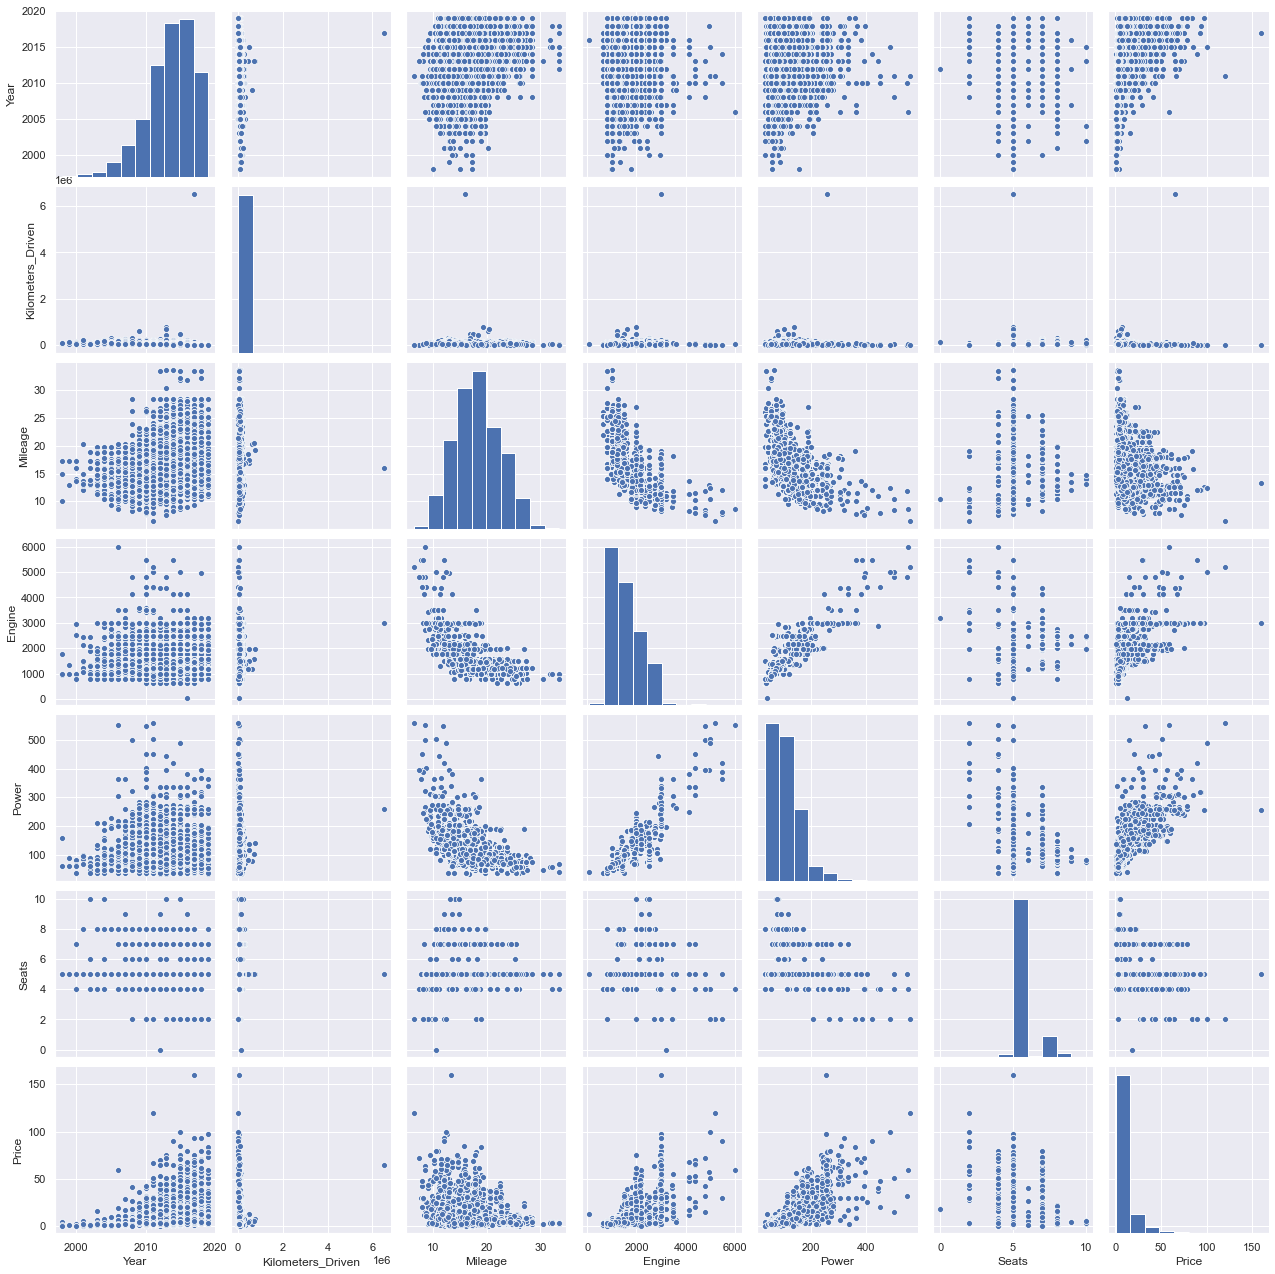

In [28]:
sns.set()
cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
sns.pairplot(data[cols])
plt.show()

In [29]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Power,143,0.023758
Mileage,70,0.011630
Seats,42,0.006978
Engine,36,0.005981
Make,0,0.000000
Price,0,0.000000
Owner_Type,0,0.000000
Transmission,0,0.000000
Fuel_Type,0,0.000000
Kilometers_Driven,0,0.000000


In [30]:
#data['Power'].fillna(value=data['Power'].mean())
data = data.dropna(how = 'any')

In [31]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Make,0,0.0
Price,0,0.0
Seats,0,0.0
Power,0,0.0
Engine,0,0.0
Mileage,0,0.0
Owner_Type,0,0.0
Transmission,0,0.0
Fuel_Type,0,0.0
Kilometers_Driven,0,0.0


## Dealing with outlier values

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5844 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5844 non-null   object 
 1   Location           5844 non-null   object 
 2   Year               5844 non-null   int64  
 3   Kilometers_Driven  5844 non-null   int64  
 4   Fuel_Type          5844 non-null   object 
 5   Transmission       5844 non-null   object 
 6   Owner_Type         5844 non-null   object 
 7   Mileage            5844 non-null   float64
 8   Engine             5844 non-null   float64
 9   Power              5844 non-null   float64
 10  Seats              5844 non-null   float64
 11  Price              5844 non-null   float64
 12  Make               5844 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 639.2+ KB


In [33]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5844.000000,5.844000e+03,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000
mean,2013.481006,5.832696e+04,18.365412,1622.834531,113.139612,5.285079,9.545515
std,3.163546,9.235508e+04,4.188280,598.989657,53.812210,0.806768,11.187139
min,1998.000000,1.710000e+02,6.400000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.349325e+04,15.300000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.256450e+04,18.330000,1495.000000,94.680000,5.000000,5.705000
75%,2016.000000,7.241450e+04,21.100000,1984.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


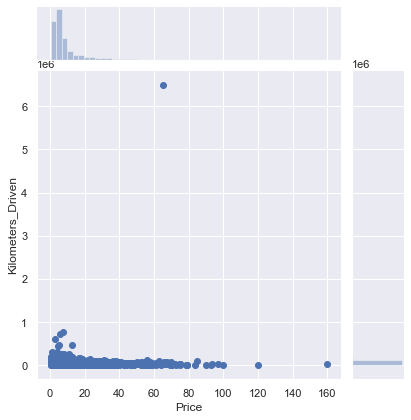

In [34]:
sns.jointplot(x="Price", y="Kilometers_Driven", data=data,kind='scatter')

In [35]:
data['Kilometers_Driven'].sort_values(ascending = False).head()

2328    6500000
340      775000
1860     720000
358      620000
2823     480000
Name: Kilometers_Driven, dtype: int64

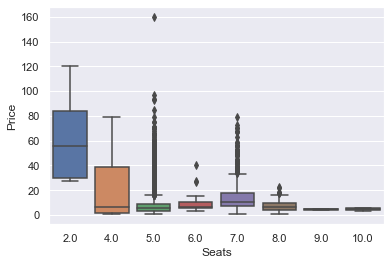

In [36]:
sns.boxplot(x="Seats",y = 'Price', data=data)

In [37]:
data['Seats'].sort_values(ascending = True).head()

5919    2.0
4893    2.0
557     2.0
798     2.0
5781    2.0
Name: Seats, dtype: float64

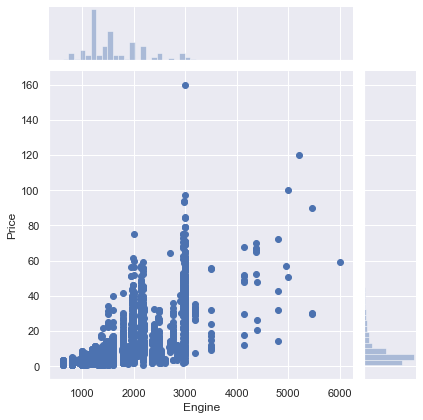

In [38]:
sns.jointplot(x="Engine", y="Price", data=data,kind='scatter')

In [39]:
data['Engine'].sort_values(ascending = True).head()

2605    624.0
112     624.0
1713    624.0
4965    624.0
41      624.0
Name: Engine, dtype: float64

In [40]:
# Removing outliers

data = data[data['Kilometers_Driven'] <= 5000000 ]

In [41]:
data[data['Price'] < 100]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


In [42]:
data = data[(data['Price'] < 130) & (data['Price'] > 0)]

In [43]:
data = data[data['Seats'] > 0 ]

In [44]:
data = data[data['Engine'] > 600]

In [45]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5842.000000,5842.000000,5842.000000,5842.000000,5842.000000,5842.000000,5842.000000
mean,2013.479801,57230.017289,18.366684,1622.365457,113.090532,5.285176,9.510269
std,3.163418,37773.924939,4.188362,598.555279,53.755977,0.806889,10.990529
min,1998.000000,171.000000,6.400000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,33497.000000,15.300000,1198.000000,75.000000,5.000000,3.512500
50%,2014.000000,52564.500000,18.330000,1495.000000,94.680000,5.000000,5.700000
75%,2016.000000,72408.250000,21.100000,1984.000000,138.100000,5.000000,10.000000
max,2019.000000,775000.000000,33.540000,5998.000000,560.000000,10.000000,120.000000


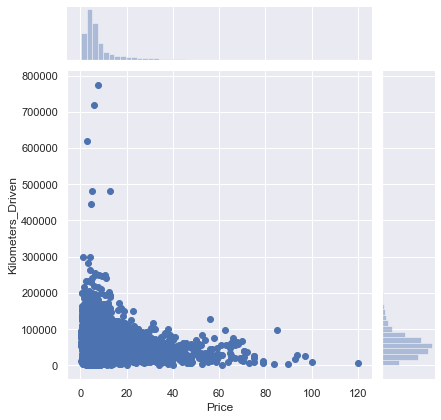

In [46]:
sns.jointplot(x="Price", y="Kilometers_Driven", data=data,kind='scatter')

## Distribution of data

### Price distribution

In [47]:
data['Price'].describe()

count    5842.000000
mean        9.510269
std        10.990529
min         0.440000
25%         3.512500
50%         5.700000
75%        10.000000
max       120.000000
Name: Price, dtype: float64

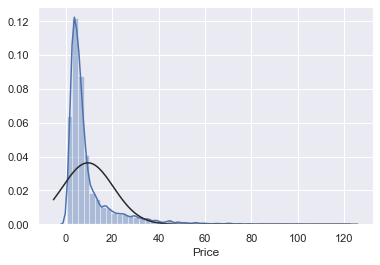

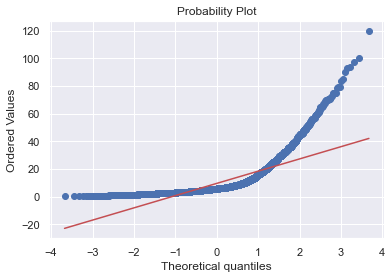

In [48]:
#histogram and normal probability plot
sns.distplot(data['Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)

In [49]:
print("Skewness: %f" %data['Price'].skew())
print("Kurtosis: %f" %data['Price'].kurt())

Skewness: 3.101679
Kurtosis: 12.871352


In [50]:
#applying log transformation

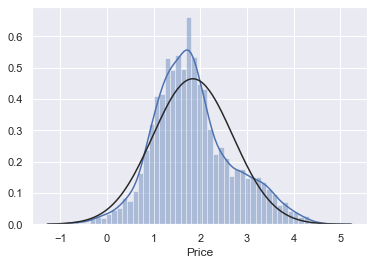

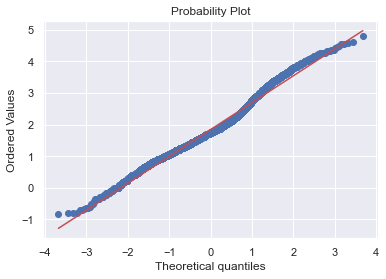

In [51]:
#transformed histogram and normal probability plot
#sns.distplot(data['Price']);

log_price = np.log(data['Price'])
                   
sns.distplot(log_price, fit=norm);
fig = plt.figure()
res = stats.probplot(log_price, plot=plt)

### Number of listings in each year

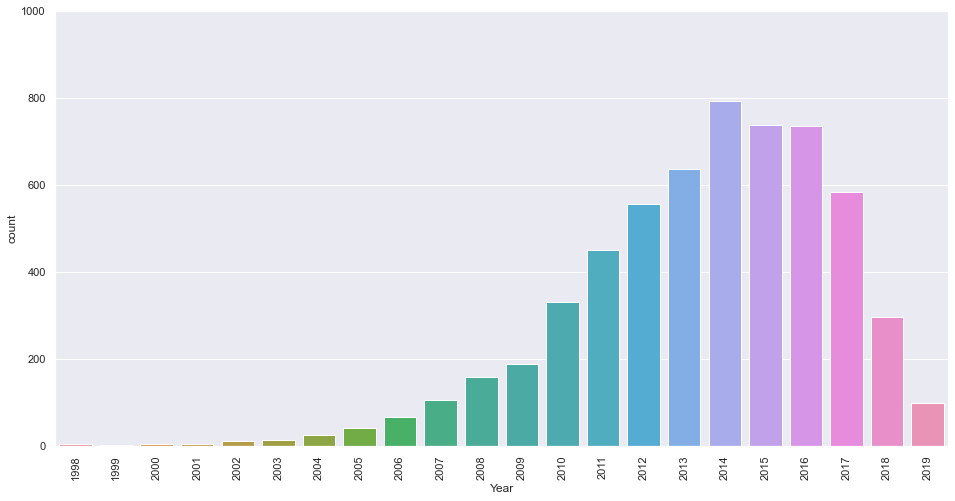

In [52]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.countplot(x='Year', data=data)
fig.axis(ymin=0, ymax=1000);
plt.xticks(rotation=90);

### Number of listing per make

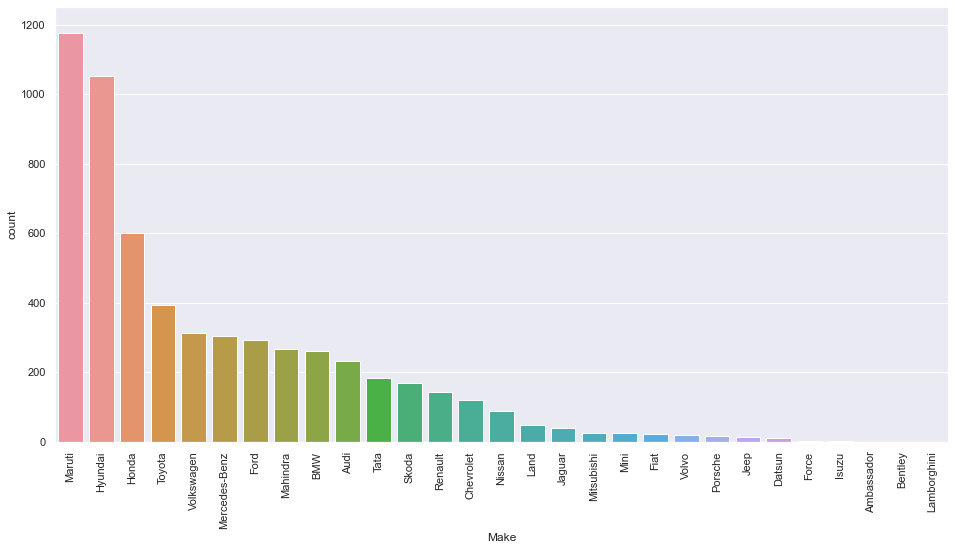

In [53]:
col_val = data['Make'].value_counts()

f, ax = plt.subplots(figsize=(16, 8))
fig = sns.countplot(x='Make', data=data, order = col_val.index)
fig.axis(ymin=0, ymax=1250);
plt.xticks(rotation=90);

In [54]:
col_val = data['Make'].value_counts()

col_val = col_val.sort_index(ascending = True)

px.treemap(data.groupby(by='Make').sum().reset_index(), path=['Make'], labels='Make', 
           values= col_val , title='Most listed Makers')

## Relationsip with categorial variables

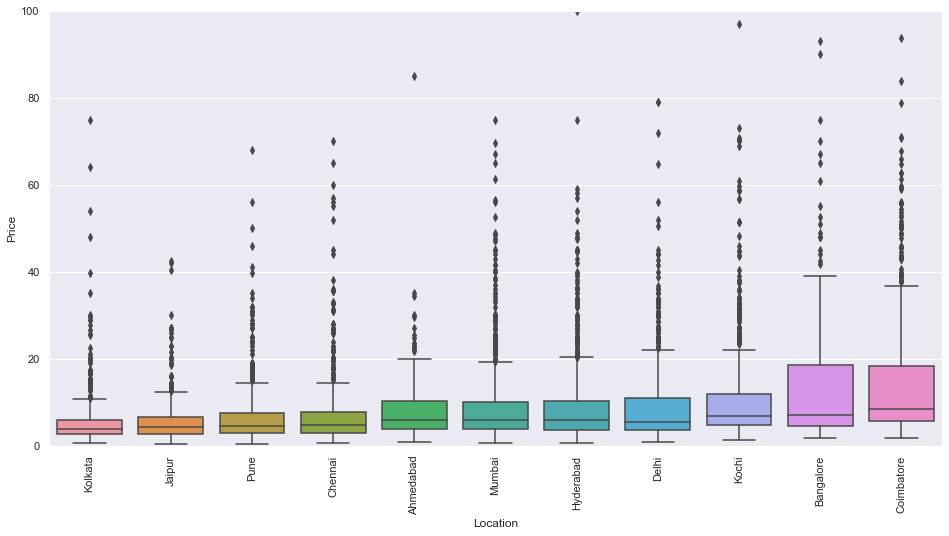

In [55]:
temp = data.groupby('Location')['Price'].mean().sort_values(ascending = True)

f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='Location', y="Price", data=data, order = temp.index)
fig.axis(ymin=0, ymax=100);
plt.xticks(rotation=90);

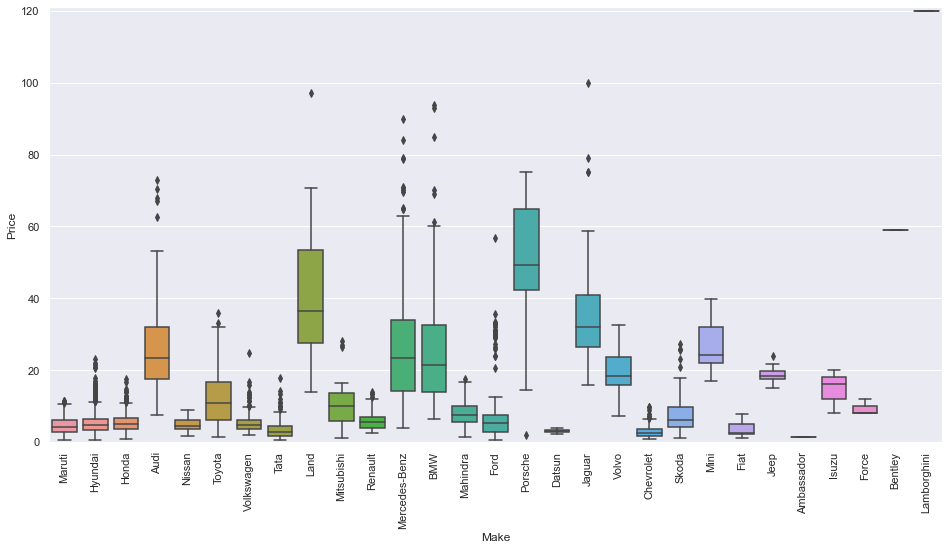

In [56]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='Make', y="Price", data=data)
fig.axis(ymin=0, ymax=121);
plt.xticks(rotation=90);

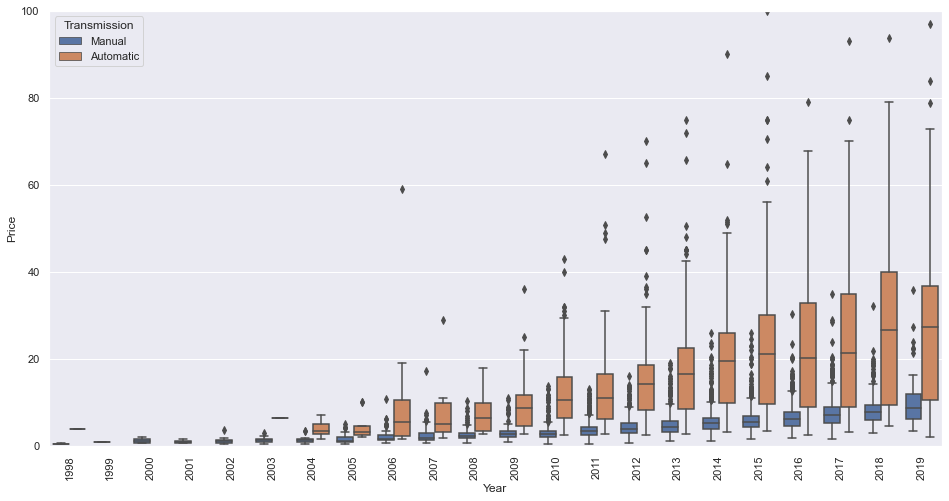

In [57]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='Year', y="Price", data=data, hue = 'Transmission')
fig.axis(ymin=0, ymax=100);
plt.xticks(rotation=90);

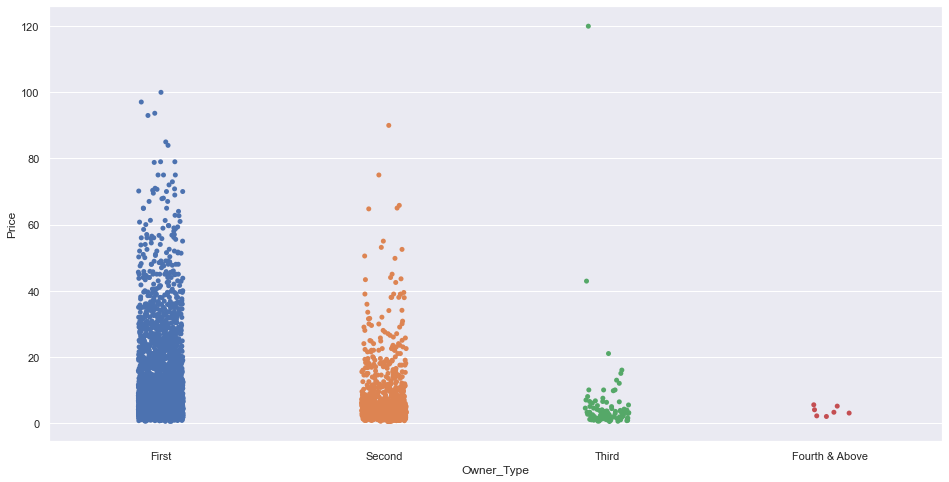

In [58]:
f, ax = plt.subplots(figsize=(16, 8))
sns.stripplot(x='Owner_Type', y="Price", data=data,order = ['First', 'Second', 'Third', 'Fourth & Above'])

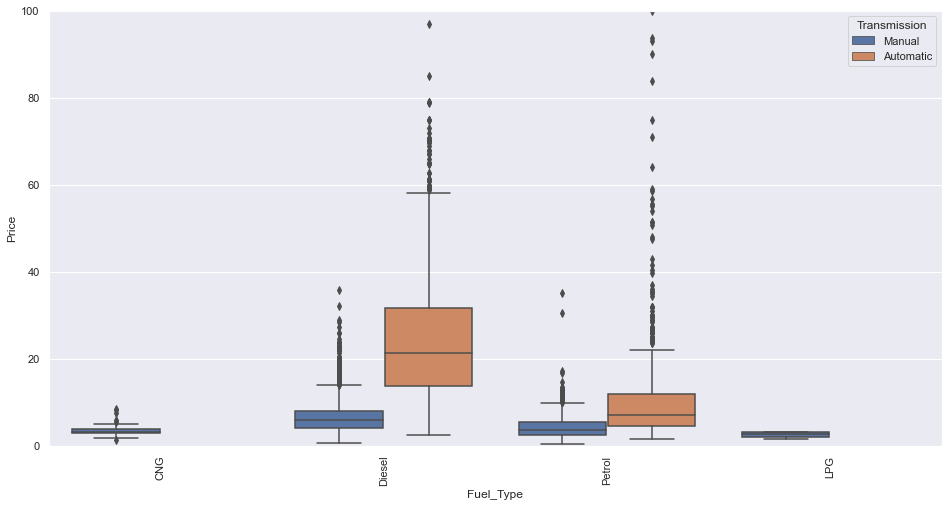

In [59]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='Fuel_Type', y="Price", data=data, hue = 'Transmission')
fig.axis(ymin=0, ymax=100);
plt.xticks(rotation=90);

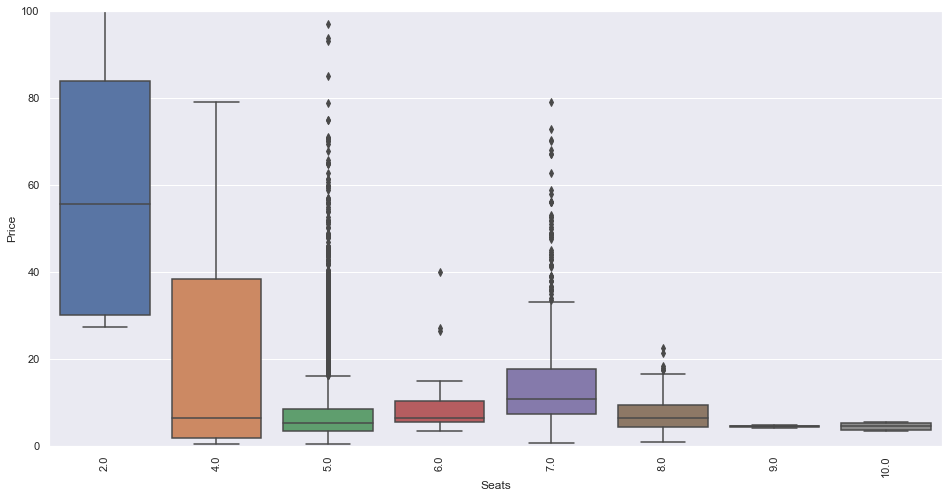

In [60]:
f, ax = plt.subplots(figsize=(16, 8))
fig1 = sns.boxplot(x='Seats', y="Price", data=data)

fig1.axis(ymin=0, ymax=100);

plt.xticks(rotation=90);

## Exploring corelations

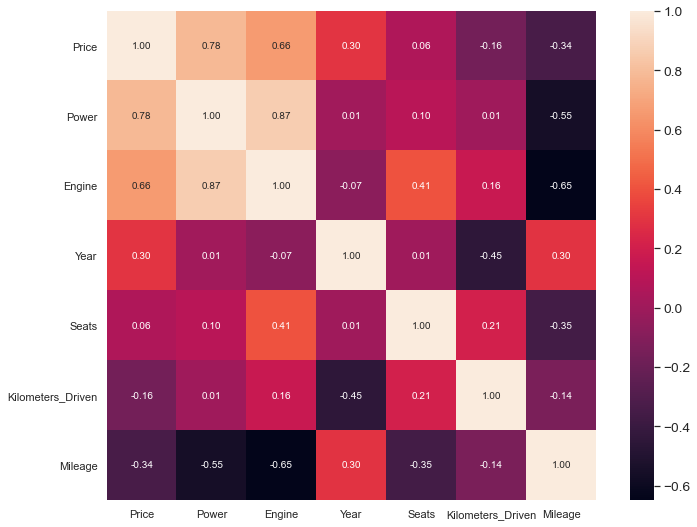

In [61]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
col = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(data[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [62]:
# Most important features relative to target Price
print("Find most important features relative to Price-target")
corrmat.sort_values(["Price"], ascending = False, inplace = True)
print(corrmat.Price)

Find most important features relative to Price-target
Price                1.000000
Power                0.781389
Engine               0.662460
Year                 0.299492
Seats                0.060031
Kilometers_Driven   -0.162819
Mileage             -0.339750
Name: Price, dtype: float64


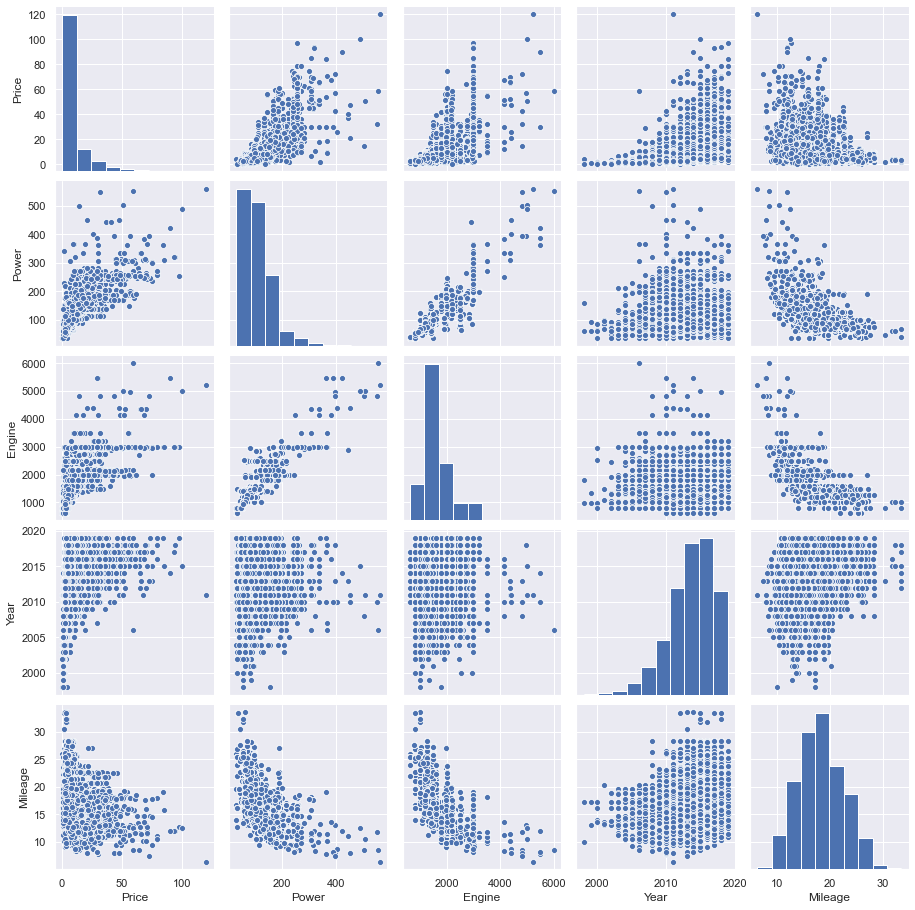

In [63]:
sns.set()
cols = ['Price', 'Power', 'Engine', 'Year','Mileage']
sns.pairplot(data[cols])
plt.show()

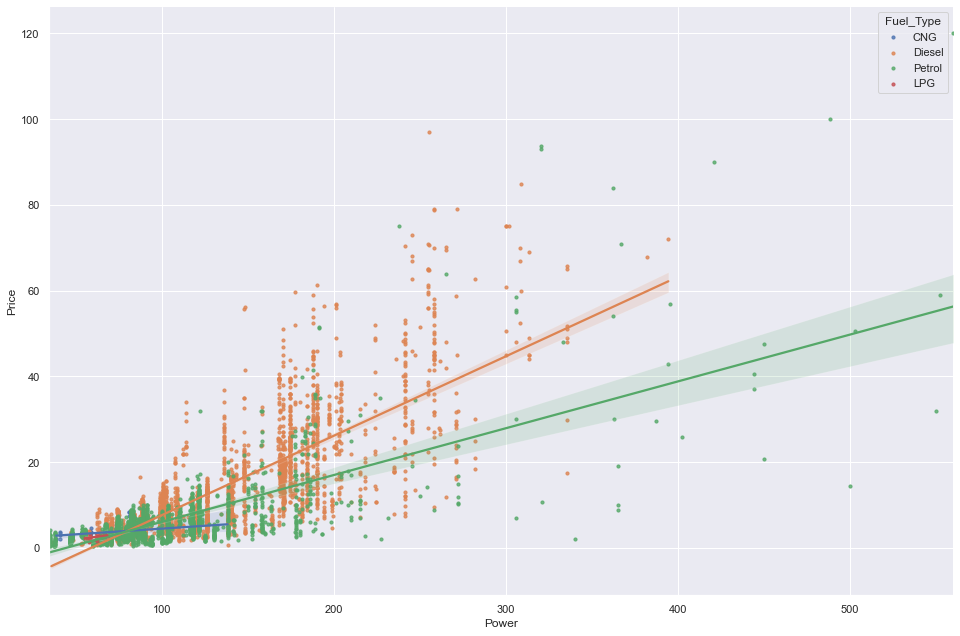

In [64]:
f = sns.lmplot(x='Power',y='Price',data=data,hue='Fuel_Type',
            scatter_kws={'s':10}, height = 9, aspect = 1.5, legend_out = False)
plt.show()

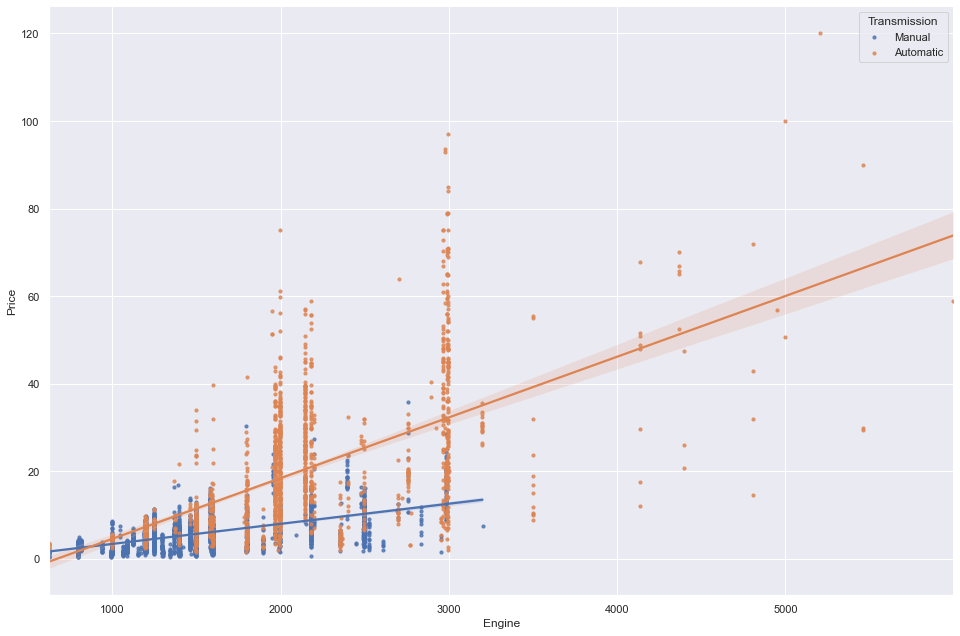

In [65]:
f = sns.lmplot(x='Engine',y='Price',data=data,hue='Transmission',
            scatter_kws={'s':10}, height = 9, aspect = 1.5, legend_out = False)
plt.show()

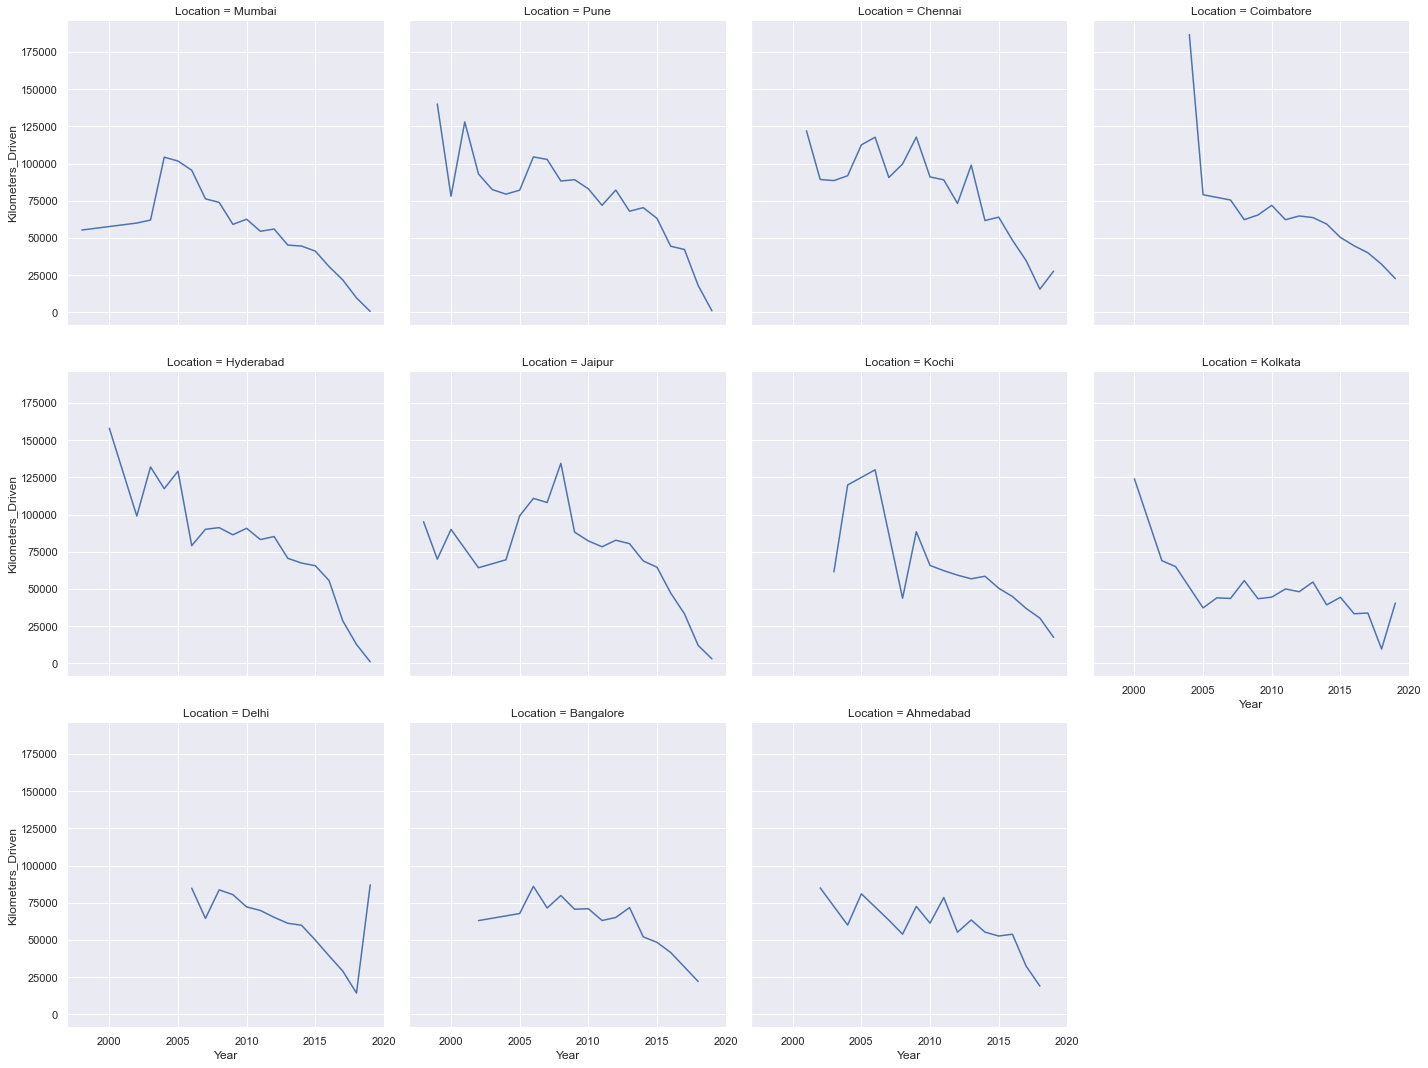

In [66]:
fig = sns.relplot(x="Year", y="Kilometers_Driven", data=data, kind="line", col ="Location", col_wrap = 4, ci=None, markers=True) 
plt.show()

In [67]:
temp_data =  data[data['Kilometers_Driven'] < 200000]
temp_data.iplot(kind='bar', x = 'Year', y = 'Kilometers_Driven',bins=25, title = 'Kilometers Distribution', xTitle = 'Year', yTitle = 'Kilometers')

In [104]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("Map.csv")

fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=df['state'],
    z=df['Mean Price'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Mean Price"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0,
        dtick=20000,

        xanchor='left',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=True,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Average Price of Used cars across states(in Lakhs)",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 10, 'b': 0},
    height=550,
    width=750
)

fig.show()

In [69]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('Map.csv')
fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state',
    color='Mean Price',
    color_continuous_scale='Reds'
)

fig.update_geos(fitbounds="locations", visible=True)

fig.show()

## Model 

In [70]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [71]:
test = pd.read_csv('test-data.csv')

test = test.drop('New_Price', axis=1)
test = test.drop('Unnamed: 0', axis=1)

In [72]:
test['Engine'] = test.Engine.str.split(' ',expand = True)
test['Power'] = test.Power.str.split(' ',expand = True)
test['Mileage'] = test.Mileage.str.split(' ',expand = True)

test['Make'] = test['Name'].str.split(" ").str[0]
test.columns = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Make']

test['Make'] = test['Make'].str.replace('SUZU','suzu')

test['Power'] = test['Power'].replace('null', np.NaN)
test['Mileage'] = test['Mileage'].replace('0.0', np.NaN)

test['Mileage'] = test['Mileage'].astype('float')
test['Engine'] = test['Engine'].astype('float')
test['Power'] = test['Power'].astype('float')

test['Engine']= test['Engine'].fillna(value=data['Engine'].mean())
test['Mileage']= test['Mileage'].fillna(value=data['Mileage'].mean())
test['Power']= test['Power'].fillna(value=data['Power'].mean())
test['Seats']= round(test['Seats'].fillna(value=data['Seats'].mean()),0)

test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Make
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.200000,4.0,Maruti
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.300000,5.0,Maruti
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.800000,7.0,Toyota
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,113.090532,5.0,Toyota
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.850000,5.0,Hyundai


In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
 11  Make               1234 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 115.8+ KB


In [74]:
test.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,2013.400324,58507.288493,18.367348,1593.818197,110.450699,5.282010
std,3.179700,35598.702098,4.051338,562.060477,50.872389,0.822366
min,1996.000000,1000.000000,7.940000,624.000000,34.200000,2.000000
25%,2011.000000,34000.000000,15.400000,1198.000000,76.200000,5.000000
50%,2014.000000,54572.500000,18.366684,1461.000000,98.600000,5.000000
75%,2016.000000,75000.000000,21.100000,1968.000000,126.300000,5.000000
max,2019.000000,350000.000000,32.260000,5998.000000,616.000000,10.000000


In [75]:
test['Make'].unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Mahindra', 'Honda', 'Audi',
       'Nissan', 'BMW', 'Ford', 'Skoda', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz', 'Tata', 'Chevrolet', 'Datsun', 'Jaguar', 'Fiat',
       'Hindustan', 'Renault', 'Mini', 'Bentley', 'Land', 'Volvo',
       'Isuzu', 'Jeep', 'Porsche', 'OpelCorsa'], dtype=object)

In [76]:
data['Make'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [77]:
set(test['Make']).issubset(set(data['Make']))

False

In [78]:
listtrain = data['Make']
listtest = test['Make']
  
# prints the missing and additional elements in list1 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 


Missing values in first list: {'OpelCorsa', 'Hindustan'}


In [79]:
test.drop(test[test['Make'].isin(['Hindustan', 'OpelCorsa'])].index, inplace = True)

In [80]:
data.drop('Name', axis=1, inplace = True)
test.drop('Name', axis=1, inplace = True)

In [81]:
import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

In [82]:
cols=np.array(data.columns[data.dtypes != object])
print(cols)

['Year' 'Kilometers_Driven' 'Mileage' 'Engine' 'Power' 'Seats' 'Price']


In [83]:
# Segregating all non numeric columns as str

cols=np.array(data.columns[data.dtypes != object])

for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

In [84]:
df_train.head()

,Location,Fuel_Type,Transmission,Owner_Type,Make
0,Mumbai,CNG,Manual,First,Maruti
1,Pune,Diesel,Manual,First,Hyundai
2,Chennai,Petrol,Manual,First,Honda
3,Chennai,Diesel,Manual,First,Maruti
4,Coimbatore,Diesel,Automatic,Second,Audi


In [85]:
df_test.head()

,Location,Fuel_Type,Transmission,Owner_Type,Make
0,Delhi,CNG,Manual,First,Maruti
1,Coimbatore,Petrol,Manual,Second,Maruti
2,Mumbai,Diesel,Manual,First,Toyota
3,Hyderabad,Diesel,Manual,First,Toyota
4,Mumbai,Petrol,Manual,First,Hyundai


In [86]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)
print(d)

defaultdict(<class 'sklearn.preprocessing._label.LabelEncoder'>, {})


In [87]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].transform(x))

df_train.head(), df_test.head()

(   Location  Fuel_Type  Transmission  Owner_Type  Make
 0         9          0             1           0    17
 1        10          1             1           0    10
 2         2          3             1           0     9
 3         2          1             1           0    17
 4         3          1             0           2     1,
    Location  Fuel_Type  Transmission  Owner_Type  Make
 0         4          0             1           0    17
 1         3          3             1           2    17
 2         9          1             1           0    26
 3         5          1             1           0    26
 4         9          3             1           0    10)

In [88]:
df_train[cols] = data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

In [89]:
df_test.head()

,Location,Fuel_Type,Transmission,Owner_Type,Make,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,4,0,1,0,17,2014,40929,32.26,998.0,58.200000,4.0
1,3,3,1,2,17,2013,54493,24.70,796.0,47.300000,5.0
2,9,1,1,0,26,2017,34000,13.68,2393.0,147.800000,7.0
3,5,1,1,0,26,2012,139000,23.59,1364.0,113.090532,5.0
4,9,3,1,0,10,2014,29000,18.50,1197.0,82.850000,5.0


In [90]:
df_train.head()

,Location,Fuel_Type,Transmission,Owner_Type,Make,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,9,0,1,0,17,2010,72000,26.60,998.0,58.16,5.0,1.75
1,10,1,1,0,10,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,2,3,1,0,9,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,2,1,1,0,17,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,3,1,0,2,1,2013,40670,15.20,1968.0,140.80,5.0,17.74


In [91]:
ftrain = ['Make', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
          'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']

def Definedata():
    # define dataset
    data2 = df_train[ftrain]
    X = data2.drop(columns=['Price']).values
    y0 = data2['Price'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y


In [92]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [93]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

In [94]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set
3,MLPRegressor,184.752418,0.732230,0.719139
4,AdaBoostRegressor,142.553164,0.846128,0.832789
0,DecisionTreeRegressor,123.053760,0.999991,0.875405
5,ExtraTreesRegressor,86.721999,0.999991,0.938117
2,RandomForestRegressor,85.866000,0.991881,0.939333
1,XGBRegressor,77.434222,0.993859,0.950663


In [95]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

		Error Table
Mean Absolute Error      :  56.79951980945671
Mean Squared  Error      :  7027.4383837521245
Root Mean Squared  Error :  83.8298179871108
Accuracy on Traing set   :  0.9929004568082856
Accuracy on Testing set  :  0.9421760489681154


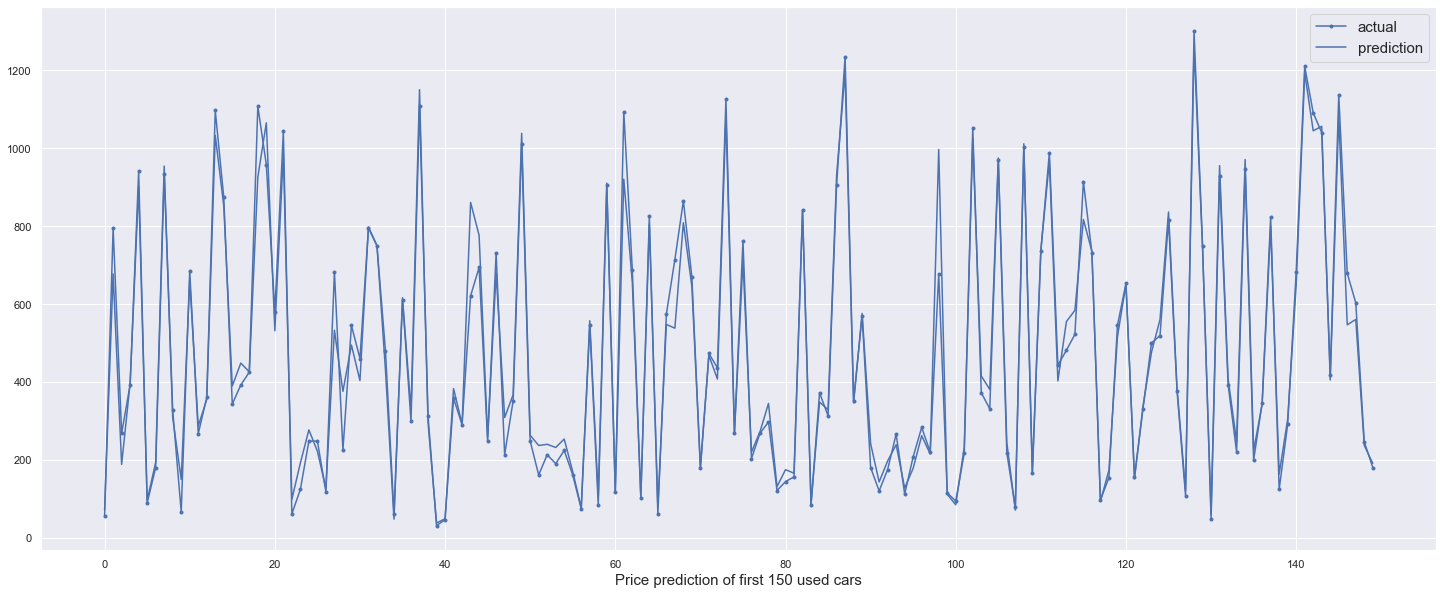

In [96]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(150, y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  46.84381568492849
Mean Squared  Error      :  5107.053400033484
Root Mean Squared  Error :  71.46365090053463
Accuracy on Traing set   :  0.9941823135354367
Accuracy on Testing set  :  0.9579775745307805


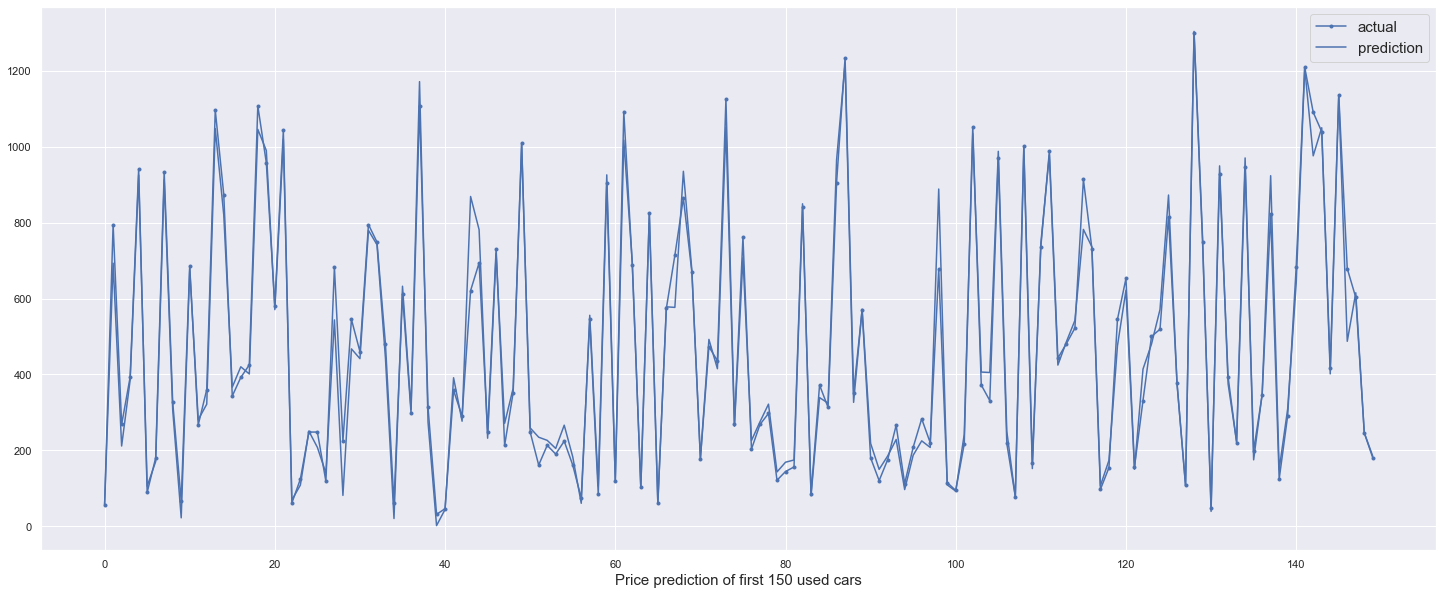

In [97]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=3000))
Graph_prediction(150, y_actual, y_predicted)

In [98]:
from catboost import CatBoostRegressor

y_predicted, y_actual = Models(CatBoostRegressor(iterations= 10000, learning_rate= 0.02, random_state= 60))

0:	learn: 340.2236698	total: 135ms	remaining: 22m 28s
1:	learn: 335.2332871	total: 136ms	remaining: 11m 21s
2:	learn: 330.0613414	total: 138ms	remaining: 7m 39s
3:	learn: 325.0047390	total: 139ms	remaining: 5m 48s
4:	learn: 319.9430441	total: 141ms	remaining: 4m 41s
5:	learn: 314.9625872	total: 142ms	remaining: 3m 57s
6:	learn: 310.1606495	total: 144ms	remaining: 3m 25s
7:	learn: 305.8066362	total: 146ms	remaining: 3m 1s
8:	learn: 301.1635056	total: 147ms	remaining: 2m 43s
9:	learn: 296.6255312	total: 149ms	remaining: 2m 28s
10:	learn: 292.2517891	total: 150ms	remaining: 2m 16s
11:	learn: 288.0273732	total: 152ms	remaining: 2m 6s
12:	learn: 283.8413233	total: 153ms	remaining: 1m 57s
13:	learn: 279.5944304	total: 155ms	remaining: 1m 50s
14:	learn: 275.7621818	total: 156ms	remaining: 1m 44s
15:	learn: 271.9708723	total: 158ms	remaining: 1m 38s
16:	learn: 268.0002283	total: 159ms	remaining: 1m 33s
17:	learn: 264.0670868	total: 161ms	remaining: 1m 29s
18:	learn: 260.5196773	total: 162ms	re

204:	learn: 93.7774467	total: 438ms	remaining: 20.9s
205:	learn: 93.6837917	total: 440ms	remaining: 20.9s
206:	learn: 93.6038466	total: 441ms	remaining: 20.9s
207:	learn: 93.4844285	total: 443ms	remaining: 20.8s
208:	learn: 93.3608520	total: 444ms	remaining: 20.8s
209:	learn: 93.2100878	total: 446ms	remaining: 20.8s
210:	learn: 93.1039114	total: 448ms	remaining: 20.8s
211:	learn: 93.0195344	total: 449ms	remaining: 20.7s
212:	learn: 92.8910592	total: 451ms	remaining: 20.7s
213:	learn: 92.8010052	total: 453ms	remaining: 20.7s
214:	learn: 92.6984711	total: 454ms	remaining: 20.7s
215:	learn: 92.6083910	total: 456ms	remaining: 20.6s
216:	learn: 92.5001884	total: 457ms	remaining: 20.6s
217:	learn: 92.3920229	total: 459ms	remaining: 20.6s
218:	learn: 92.3093458	total: 460ms	remaining: 20.6s
219:	learn: 92.2391536	total: 462ms	remaining: 20.5s
220:	learn: 92.1810601	total: 464ms	remaining: 20.5s
221:	learn: 92.0331006	total: 465ms	remaining: 20.5s
222:	learn: 91.9244393	total: 467ms	remaining:

412:	learn: 79.0418394	total: 766ms	remaining: 17.8s
413:	learn: 78.9445549	total: 768ms	remaining: 17.8s
414:	learn: 78.8580065	total: 770ms	remaining: 17.8s
415:	learn: 78.8097944	total: 771ms	remaining: 17.8s
416:	learn: 78.7673462	total: 773ms	remaining: 17.8s
417:	learn: 78.7093472	total: 774ms	remaining: 17.8s
418:	learn: 78.5975841	total: 776ms	remaining: 17.7s
419:	learn: 78.5431492	total: 778ms	remaining: 17.7s
420:	learn: 78.5063652	total: 779ms	remaining: 17.7s
421:	learn: 78.4561635	total: 781ms	remaining: 17.7s
422:	learn: 78.4174854	total: 783ms	remaining: 17.7s
423:	learn: 78.3396561	total: 784ms	remaining: 17.7s
424:	learn: 78.2939633	total: 786ms	remaining: 17.7s
425:	learn: 78.2481914	total: 788ms	remaining: 17.7s
426:	learn: 78.1938558	total: 789ms	remaining: 17.7s
427:	learn: 78.1525623	total: 791ms	remaining: 17.7s
428:	learn: 78.1250546	total: 792ms	remaining: 17.7s
429:	learn: 78.0885395	total: 794ms	remaining: 17.7s
430:	learn: 78.0340922	total: 796ms	remaining:

617:	learn: 70.7168640	total: 1.09s	remaining: 16.6s
618:	learn: 70.6687686	total: 1.09s	remaining: 16.6s
619:	learn: 70.6414406	total: 1.09s	remaining: 16.6s
620:	learn: 70.6047731	total: 1.09s	remaining: 16.5s
621:	learn: 70.5558896	total: 1.1s	remaining: 16.5s
622:	learn: 70.5230196	total: 1.1s	remaining: 16.5s
623:	learn: 70.4954838	total: 1.1s	remaining: 16.5s
624:	learn: 70.4746840	total: 1.1s	remaining: 16.5s
625:	learn: 70.4592566	total: 1.1s	remaining: 16.5s
626:	learn: 70.4203387	total: 1.1s	remaining: 16.5s
627:	learn: 70.3953698	total: 1.11s	remaining: 16.5s
628:	learn: 70.3813535	total: 1.11s	remaining: 16.5s
629:	learn: 70.3341897	total: 1.11s	remaining: 16.5s
630:	learn: 70.3148298	total: 1.11s	remaining: 16.5s
631:	learn: 70.3080713	total: 1.11s	remaining: 16.5s
632:	learn: 70.2852575	total: 1.11s	remaining: 16.5s
633:	learn: 70.2508682	total: 1.12s	remaining: 16.5s
634:	learn: 70.2436343	total: 1.12s	remaining: 16.5s
635:	learn: 70.2356603	total: 1.12s	remaining: 16.5s

826:	learn: 65.4036859	total: 1.41s	remaining: 15.7s
827:	learn: 65.3846626	total: 1.42s	remaining: 15.7s
828:	learn: 65.3587219	total: 1.42s	remaining: 15.7s
829:	learn: 65.3311590	total: 1.42s	remaining: 15.7s
830:	learn: 65.3005017	total: 1.42s	remaining: 15.7s
831:	learn: 65.2735401	total: 1.42s	remaining: 15.7s
832:	learn: 65.2515626	total: 1.42s	remaining: 15.7s
833:	learn: 65.2203036	total: 1.43s	remaining: 15.7s
834:	learn: 65.2087566	total: 1.43s	remaining: 15.7s
835:	learn: 65.1864280	total: 1.43s	remaining: 15.7s
836:	learn: 65.1515378	total: 1.43s	remaining: 15.7s
837:	learn: 65.1367478	total: 1.43s	remaining: 15.7s
838:	learn: 65.1216866	total: 1.43s	remaining: 15.6s
839:	learn: 65.0919396	total: 1.43s	remaining: 15.6s
840:	learn: 65.0659376	total: 1.44s	remaining: 15.6s
841:	learn: 65.0365372	total: 1.44s	remaining: 15.6s
842:	learn: 65.0315865	total: 1.44s	remaining: 15.6s
843:	learn: 65.0117980	total: 1.44s	remaining: 15.6s
844:	learn: 65.0112448	total: 1.44s	remaining:

1035:	learn: 61.1010895	total: 1.74s	remaining: 15s
1036:	learn: 61.0822327	total: 1.74s	remaining: 15s
1037:	learn: 61.0773733	total: 1.74s	remaining: 15s
1038:	learn: 61.0420357	total: 1.74s	remaining: 15s
1039:	learn: 61.0294769	total: 1.74s	remaining: 15s
1040:	learn: 61.0023321	total: 1.75s	remaining: 15s
1041:	learn: 60.9822910	total: 1.75s	remaining: 15s
1042:	learn: 60.9674193	total: 1.75s	remaining: 15s
1043:	learn: 60.9417918	total: 1.75s	remaining: 15s
1044:	learn: 60.9238649	total: 1.75s	remaining: 15s
1045:	learn: 60.8997806	total: 1.75s	remaining: 15s
1046:	learn: 60.8668574	total: 1.75s	remaining: 15s
1047:	learn: 60.8581580	total: 1.76s	remaining: 15s
1048:	learn: 60.8310596	total: 1.76s	remaining: 15s
1049:	learn: 60.8042921	total: 1.76s	remaining: 15s
1050:	learn: 60.7930761	total: 1.76s	remaining: 15s
1051:	learn: 60.7811724	total: 1.76s	remaining: 15s
1052:	learn: 60.7408405	total: 1.76s	remaining: 15s
1053:	learn: 60.7176009	total: 1.76s	remaining: 15s
1054:	learn:

1239:	learn: 57.4834320	total: 2.07s	remaining: 14.6s
1240:	learn: 57.4650052	total: 2.07s	remaining: 14.6s
1241:	learn: 57.4579766	total: 2.07s	remaining: 14.6s
1242:	learn: 57.4347913	total: 2.07s	remaining: 14.6s
1243:	learn: 57.4210454	total: 2.07s	remaining: 14.6s
1244:	learn: 57.4013028	total: 2.08s	remaining: 14.6s
1245:	learn: 57.3891188	total: 2.08s	remaining: 14.6s
1246:	learn: 57.3809591	total: 2.08s	remaining: 14.6s
1247:	learn: 57.3637444	total: 2.08s	remaining: 14.6s
1248:	learn: 57.3461328	total: 2.08s	remaining: 14.6s
1249:	learn: 57.3347244	total: 2.08s	remaining: 14.6s
1250:	learn: 57.3169752	total: 2.08s	remaining: 14.6s
1251:	learn: 57.3028398	total: 2.09s	remaining: 14.6s
1252:	learn: 57.2824529	total: 2.09s	remaining: 14.6s
1253:	learn: 57.2720669	total: 2.09s	remaining: 14.6s
1254:	learn: 57.2566851	total: 2.09s	remaining: 14.6s
1255:	learn: 57.2414247	total: 2.09s	remaining: 14.6s
1256:	learn: 57.2191527	total: 2.09s	remaining: 14.6s
1257:	learn: 57.2089920	tota

1446:	learn: 54.4515803	total: 2.39s	remaining: 14.1s
1447:	learn: 54.4377182	total: 2.39s	remaining: 14.1s
1448:	learn: 54.4260632	total: 2.39s	remaining: 14.1s
1449:	learn: 54.4141553	total: 2.39s	remaining: 14.1s
1450:	learn: 54.4012173	total: 2.39s	remaining: 14.1s
1451:	learn: 54.3827599	total: 2.39s	remaining: 14.1s
1452:	learn: 54.3671974	total: 2.4s	remaining: 14.1s
1453:	learn: 54.3570272	total: 2.4s	remaining: 14.1s
1454:	learn: 54.3417719	total: 2.4s	remaining: 14.1s
1455:	learn: 54.3331843	total: 2.4s	remaining: 14.1s
1456:	learn: 54.3192418	total: 2.4s	remaining: 14.1s
1457:	learn: 54.3087450	total: 2.4s	remaining: 14.1s
1458:	learn: 54.2970602	total: 2.4s	remaining: 14.1s
1459:	learn: 54.2875523	total: 2.41s	remaining: 14.1s
1460:	learn: 54.2711116	total: 2.41s	remaining: 14.1s
1461:	learn: 54.2555361	total: 2.41s	remaining: 14.1s
1462:	learn: 54.2436242	total: 2.41s	remaining: 14.1s
1463:	learn: 54.2307679	total: 2.41s	remaining: 14.1s
1464:	learn: 54.2134870	total: 2.41

1660:	learn: 51.8787283	total: 2.71s	remaining: 13.6s
1661:	learn: 51.8644796	total: 2.71s	remaining: 13.6s
1662:	learn: 51.8536401	total: 2.71s	remaining: 13.6s
1663:	learn: 51.8431086	total: 2.71s	remaining: 13.6s
1664:	learn: 51.8336076	total: 2.72s	remaining: 13.6s
1665:	learn: 51.8311166	total: 2.72s	remaining: 13.6s
1666:	learn: 51.8128261	total: 2.72s	remaining: 13.6s
1667:	learn: 51.7935784	total: 2.72s	remaining: 13.6s
1668:	learn: 51.7841700	total: 2.72s	remaining: 13.6s
1669:	learn: 51.7721890	total: 2.73s	remaining: 13.6s
1670:	learn: 51.7613135	total: 2.73s	remaining: 13.6s
1671:	learn: 51.7468041	total: 2.73s	remaining: 13.6s
1672:	learn: 51.7329815	total: 2.73s	remaining: 13.6s
1673:	learn: 51.7311215	total: 2.73s	remaining: 13.6s
1674:	learn: 51.7199238	total: 2.73s	remaining: 13.6s
1675:	learn: 51.7166433	total: 2.73s	remaining: 13.6s
1676:	learn: 51.7004444	total: 2.74s	remaining: 13.6s
1677:	learn: 51.6902875	total: 2.74s	remaining: 13.6s
1678:	learn: 51.6779353	tota

1870:	learn: 49.8410591	total: 3.03s	remaining: 13.2s
1871:	learn: 49.8290297	total: 3.04s	remaining: 13.2s
1872:	learn: 49.8287869	total: 3.04s	remaining: 13.2s
1873:	learn: 49.8116545	total: 3.04s	remaining: 13.2s
1874:	learn: 49.8056542	total: 3.04s	remaining: 13.2s
1875:	learn: 49.7916173	total: 3.04s	remaining: 13.2s
1876:	learn: 49.7840768	total: 3.04s	remaining: 13.2s
1877:	learn: 49.7719343	total: 3.04s	remaining: 13.2s
1878:	learn: 49.7650869	total: 3.05s	remaining: 13.2s
1879:	learn: 49.7602099	total: 3.05s	remaining: 13.2s
1880:	learn: 49.7517878	total: 3.05s	remaining: 13.2s
1881:	learn: 49.7441252	total: 3.05s	remaining: 13.2s
1882:	learn: 49.7345810	total: 3.05s	remaining: 13.2s
1883:	learn: 49.7249348	total: 3.05s	remaining: 13.2s
1884:	learn: 49.7102298	total: 3.06s	remaining: 13.2s
1885:	learn: 49.7029233	total: 3.06s	remaining: 13.2s
1886:	learn: 49.6905985	total: 3.06s	remaining: 13.1s
1887:	learn: 49.6834751	total: 3.06s	remaining: 13.1s
1888:	learn: 49.6786513	tota

2084:	learn: 48.0551704	total: 3.36s	remaining: 12.7s
2085:	learn: 48.0450261	total: 3.36s	remaining: 12.7s
2086:	learn: 48.0323988	total: 3.36s	remaining: 12.7s
2087:	learn: 48.0243857	total: 3.36s	remaining: 12.7s
2088:	learn: 48.0242562	total: 3.36s	remaining: 12.7s
2089:	learn: 48.0196292	total: 3.36s	remaining: 12.7s
2090:	learn: 48.0054279	total: 3.37s	remaining: 12.7s
2091:	learn: 47.9989959	total: 3.37s	remaining: 12.7s
2092:	learn: 47.9939407	total: 3.37s	remaining: 12.7s
2093:	learn: 47.9855950	total: 3.37s	remaining: 12.7s
2094:	learn: 47.9770282	total: 3.37s	remaining: 12.7s
2095:	learn: 47.9700580	total: 3.37s	remaining: 12.7s
2096:	learn: 47.9634447	total: 3.38s	remaining: 12.7s
2097:	learn: 47.9518752	total: 3.38s	remaining: 12.7s
2098:	learn: 47.9377383	total: 3.38s	remaining: 12.7s
2099:	learn: 47.9348869	total: 3.38s	remaining: 12.7s
2100:	learn: 47.9326938	total: 3.38s	remaining: 12.7s
2101:	learn: 47.9242237	total: 3.38s	remaining: 12.7s
2102:	learn: 47.9188080	tota

2297:	learn: 46.4333705	total: 3.68s	remaining: 12.3s
2298:	learn: 46.4260212	total: 3.68s	remaining: 12.3s
2299:	learn: 46.4203477	total: 3.68s	remaining: 12.3s
2300:	learn: 46.4137623	total: 3.69s	remaining: 12.3s
2301:	learn: 46.4052017	total: 3.69s	remaining: 12.3s
2302:	learn: 46.4011283	total: 3.69s	remaining: 12.3s
2303:	learn: 46.3948498	total: 3.69s	remaining: 12.3s
2304:	learn: 46.3878711	total: 3.69s	remaining: 12.3s
2305:	learn: 46.3807866	total: 3.69s	remaining: 12.3s
2306:	learn: 46.3751738	total: 3.69s	remaining: 12.3s
2307:	learn: 46.3647335	total: 3.7s	remaining: 12.3s
2308:	learn: 46.3554345	total: 3.7s	remaining: 12.3s
2309:	learn: 46.3444643	total: 3.7s	remaining: 12.3s
2310:	learn: 46.3348221	total: 3.7s	remaining: 12.3s
2311:	learn: 46.3252772	total: 3.7s	remaining: 12.3s
2312:	learn: 46.3133149	total: 3.7s	remaining: 12.3s
2313:	learn: 46.3056896	total: 3.71s	remaining: 12.3s
2314:	learn: 46.2976414	total: 3.71s	remaining: 12.3s
2315:	learn: 46.2960449	total: 3.7

2510:	learn: 44.9639950	total: 4s	remaining: 11.9s
2511:	learn: 44.9558277	total: 4s	remaining: 11.9s
2512:	learn: 44.9492908	total: 4.01s	remaining: 11.9s
2513:	learn: 44.9328988	total: 4.01s	remaining: 11.9s
2514:	learn: 44.9298254	total: 4.01s	remaining: 11.9s
2515:	learn: 44.9208312	total: 4.01s	remaining: 11.9s
2516:	learn: 44.9116385	total: 4.01s	remaining: 11.9s
2517:	learn: 44.9058711	total: 4.01s	remaining: 11.9s
2518:	learn: 44.9007945	total: 4.02s	remaining: 11.9s
2519:	learn: 44.8947537	total: 4.02s	remaining: 11.9s
2520:	learn: 44.8858202	total: 4.02s	remaining: 11.9s
2521:	learn: 44.8792043	total: 4.02s	remaining: 11.9s
2522:	learn: 44.8729581	total: 4.02s	remaining: 11.9s
2523:	learn: 44.8672052	total: 4.02s	remaining: 11.9s
2524:	learn: 44.8559257	total: 4.03s	remaining: 11.9s
2525:	learn: 44.8499567	total: 4.03s	remaining: 11.9s
2526:	learn: 44.8436632	total: 4.03s	remaining: 11.9s
2527:	learn: 44.8429707	total: 4.03s	remaining: 11.9s
2528:	learn: 44.8368152	total: 4.0

2723:	learn: 43.6482138	total: 4.33s	remaining: 11.6s
2724:	learn: 43.6433267	total: 4.33s	remaining: 11.6s
2725:	learn: 43.6357488	total: 4.33s	remaining: 11.6s
2726:	learn: 43.6292871	total: 4.33s	remaining: 11.5s
2727:	learn: 43.6211751	total: 4.33s	remaining: 11.5s
2728:	learn: 43.6112941	total: 4.33s	remaining: 11.5s
2729:	learn: 43.6082145	total: 4.33s	remaining: 11.5s
2730:	learn: 43.6025888	total: 4.34s	remaining: 11.5s
2731:	learn: 43.5967261	total: 4.34s	remaining: 11.5s
2732:	learn: 43.5966441	total: 4.34s	remaining: 11.5s
2733:	learn: 43.5870102	total: 4.34s	remaining: 11.5s
2734:	learn: 43.5812718	total: 4.34s	remaining: 11.5s
2735:	learn: 43.5772288	total: 4.34s	remaining: 11.5s
2736:	learn: 43.5691380	total: 4.35s	remaining: 11.5s
2737:	learn: 43.5633436	total: 4.35s	remaining: 11.5s
2738:	learn: 43.5604104	total: 4.35s	remaining: 11.5s
2739:	learn: 43.5559704	total: 4.35s	remaining: 11.5s
2740:	learn: 43.5471177	total: 4.35s	remaining: 11.5s
2741:	learn: 43.5418671	tota

2937:	learn: 42.3970981	total: 4.65s	remaining: 11.2s
2938:	learn: 42.3918805	total: 4.65s	remaining: 11.2s
2939:	learn: 42.3896976	total: 4.65s	remaining: 11.2s
2940:	learn: 42.3859644	total: 4.66s	remaining: 11.2s
2941:	learn: 42.3829033	total: 4.66s	remaining: 11.2s
2942:	learn: 42.3766639	total: 4.66s	remaining: 11.2s
2943:	learn: 42.3722110	total: 4.66s	remaining: 11.2s
2944:	learn: 42.3636341	total: 4.66s	remaining: 11.2s
2945:	learn: 42.3566031	total: 4.66s	remaining: 11.2s
2946:	learn: 42.3519864	total: 4.66s	remaining: 11.2s
2947:	learn: 42.3440322	total: 4.67s	remaining: 11.2s
2948:	learn: 42.3382184	total: 4.67s	remaining: 11.2s
2949:	learn: 42.3309486	total: 4.67s	remaining: 11.2s
2950:	learn: 42.3304119	total: 4.67s	remaining: 11.2s
2951:	learn: 42.3261771	total: 4.67s	remaining: 11.2s
2952:	learn: 42.3218161	total: 4.67s	remaining: 11.2s
2953:	learn: 42.3157745	total: 4.67s	remaining: 11.2s
2954:	learn: 42.3097513	total: 4.68s	remaining: 11.2s
2955:	learn: 42.3019464	tota

3140:	learn: 41.2929049	total: 4.97s	remaining: 10.9s
3141:	learn: 41.2835734	total: 4.98s	remaining: 10.9s
3142:	learn: 41.2776796	total: 4.98s	remaining: 10.9s
3143:	learn: 41.2683899	total: 4.98s	remaining: 10.9s
3144:	learn: 41.2657306	total: 4.98s	remaining: 10.9s
3145:	learn: 41.2621001	total: 4.98s	remaining: 10.9s
3146:	learn: 41.2580486	total: 4.98s	remaining: 10.9s
3147:	learn: 41.2523868	total: 4.99s	remaining: 10.9s
3148:	learn: 41.2469880	total: 4.99s	remaining: 10.9s
3149:	learn: 41.2435295	total: 4.99s	remaining: 10.8s
3150:	learn: 41.2396636	total: 4.99s	remaining: 10.8s
3151:	learn: 41.2344154	total: 4.99s	remaining: 10.8s
3152:	learn: 41.2313692	total: 4.99s	remaining: 10.8s
3153:	learn: 41.2243888	total: 5s	remaining: 10.8s
3154:	learn: 41.2218402	total: 5s	remaining: 10.8s
3155:	learn: 41.2161723	total: 5s	remaining: 10.8s
3156:	learn: 41.2096254	total: 5s	remaining: 10.8s
3157:	learn: 41.2046854	total: 5s	remaining: 10.8s
3158:	learn: 41.2013561	total: 5s	remaining

3354:	learn: 40.1815059	total: 5.3s	remaining: 10.5s
3355:	learn: 40.1792517	total: 5.3s	remaining: 10.5s
3356:	learn: 40.1751009	total: 5.3s	remaining: 10.5s
3357:	learn: 40.1718713	total: 5.3s	remaining: 10.5s
3358:	learn: 40.1708468	total: 5.3s	remaining: 10.5s
3359:	learn: 40.1682937	total: 5.3s	remaining: 10.5s
3360:	learn: 40.1656488	total: 5.31s	remaining: 10.5s
3361:	learn: 40.1628553	total: 5.31s	remaining: 10.5s
3362:	learn: 40.1627902	total: 5.31s	remaining: 10.5s
3363:	learn: 40.1585391	total: 5.31s	remaining: 10.5s
3364:	learn: 40.1533607	total: 5.31s	remaining: 10.5s
3365:	learn: 40.1481429	total: 5.32s	remaining: 10.5s
3366:	learn: 40.1398014	total: 5.32s	remaining: 10.5s
3367:	learn: 40.1342741	total: 5.32s	remaining: 10.5s
3368:	learn: 40.1267313	total: 5.32s	remaining: 10.5s
3369:	learn: 40.1215158	total: 5.32s	remaining: 10.5s
3370:	learn: 40.1182505	total: 5.32s	remaining: 10.5s
3371:	learn: 40.1122520	total: 5.32s	remaining: 10.5s
3372:	learn: 40.1052275	total: 5.3

3563:	learn: 39.1554152	total: 5.62s	remaining: 10.1s
3564:	learn: 39.1521192	total: 5.62s	remaining: 10.1s
3565:	learn: 39.1493606	total: 5.62s	remaining: 10.1s
3566:	learn: 39.1415878	total: 5.62s	remaining: 10.1s
3567:	learn: 39.1372531	total: 5.62s	remaining: 10.1s
3568:	learn: 39.1337998	total: 5.63s	remaining: 10.1s
3569:	learn: 39.1308090	total: 5.63s	remaining: 10.1s
3570:	learn: 39.1255225	total: 5.63s	remaining: 10.1s
3571:	learn: 39.1206346	total: 5.63s	remaining: 10.1s
3572:	learn: 39.1128946	total: 5.63s	remaining: 10.1s
3573:	learn: 39.1101032	total: 5.63s	remaining: 10.1s
3574:	learn: 39.1073514	total: 5.63s	remaining: 10.1s
3575:	learn: 39.1049538	total: 5.64s	remaining: 10.1s
3576:	learn: 39.0968884	total: 5.64s	remaining: 10.1s
3577:	learn: 39.0953507	total: 5.64s	remaining: 10.1s
3578:	learn: 39.0865029	total: 5.64s	remaining: 10.1s
3579:	learn: 39.0801390	total: 5.64s	remaining: 10.1s
3580:	learn: 39.0740024	total: 5.64s	remaining: 10.1s
3581:	learn: 39.0656498	tota

3773:	learn: 38.1800391	total: 5.94s	remaining: 9.8s
3774:	learn: 38.1730756	total: 5.94s	remaining: 9.8s
3775:	learn: 38.1703562	total: 5.94s	remaining: 9.8s
3776:	learn: 38.1670818	total: 5.95s	remaining: 9.8s
3777:	learn: 38.1621927	total: 5.95s	remaining: 9.79s
3778:	learn: 38.1561080	total: 5.95s	remaining: 9.79s
3779:	learn: 38.1526279	total: 5.95s	remaining: 9.79s
3780:	learn: 38.1509172	total: 5.95s	remaining: 9.79s
3781:	learn: 38.1438924	total: 5.95s	remaining: 9.79s
3782:	learn: 38.1369655	total: 5.96s	remaining: 9.79s
3783:	learn: 38.1299323	total: 5.96s	remaining: 9.79s
3784:	learn: 38.1253379	total: 5.96s	remaining: 9.78s
3785:	learn: 38.1222098	total: 5.96s	remaining: 9.78s
3786:	learn: 38.1122381	total: 5.96s	remaining: 9.78s
3787:	learn: 38.1048753	total: 5.96s	remaining: 9.78s
3788:	learn: 38.1035558	total: 5.96s	remaining: 9.78s
3789:	learn: 38.0983371	total: 5.97s	remaining: 9.78s
3790:	learn: 38.0949702	total: 5.97s	remaining: 9.77s
3791:	learn: 38.0928207	total: 5

3987:	learn: 37.2828063	total: 6.26s	remaining: 9.44s
3988:	learn: 37.2806423	total: 6.27s	remaining: 9.44s
3989:	learn: 37.2770173	total: 6.27s	remaining: 9.44s
3990:	learn: 37.2686392	total: 6.27s	remaining: 9.44s
3991:	learn: 37.2654844	total: 6.27s	remaining: 9.44s
3992:	learn: 37.2641121	total: 6.27s	remaining: 9.44s
3993:	learn: 37.2567228	total: 6.27s	remaining: 9.44s
3994:	learn: 37.2517439	total: 6.28s	remaining: 9.43s
3995:	learn: 37.2478699	total: 6.28s	remaining: 9.43s
3996:	learn: 37.2456419	total: 6.28s	remaining: 9.43s
3997:	learn: 37.2420709	total: 6.28s	remaining: 9.43s
3998:	learn: 37.2382327	total: 6.28s	remaining: 9.43s
3999:	learn: 37.2347229	total: 6.28s	remaining: 9.43s
4000:	learn: 37.2305438	total: 6.29s	remaining: 9.42s
4001:	learn: 37.2266892	total: 6.29s	remaining: 9.42s
4002:	learn: 37.2241199	total: 6.29s	remaining: 9.42s
4003:	learn: 37.2220676	total: 6.29s	remaining: 9.42s
4004:	learn: 37.2168995	total: 6.29s	remaining: 9.42s
4005:	learn: 37.2141718	tota

4198:	learn: 36.4496391	total: 6.59s	remaining: 9.1s
4199:	learn: 36.4448482	total: 6.59s	remaining: 9.1s
4200:	learn: 36.4398028	total: 6.59s	remaining: 9.1s
4201:	learn: 36.4360163	total: 6.59s	remaining: 9.1s
4202:	learn: 36.4293145	total: 6.59s	remaining: 9.1s
4203:	learn: 36.4258107	total: 6.6s	remaining: 9.09s
4204:	learn: 36.4219728	total: 6.6s	remaining: 9.09s
4205:	learn: 36.4178094	total: 6.6s	remaining: 9.09s
4206:	learn: 36.4148019	total: 6.6s	remaining: 9.09s
4207:	learn: 36.4118140	total: 6.6s	remaining: 9.09s
4208:	learn: 36.4075923	total: 6.6s	remaining: 9.09s
4209:	learn: 36.4020181	total: 6.61s	remaining: 9.09s
4210:	learn: 36.3976288	total: 6.61s	remaining: 9.08s
4211:	learn: 36.3944357	total: 6.61s	remaining: 9.08s
4212:	learn: 36.3926916	total: 6.61s	remaining: 9.08s
4213:	learn: 36.3887604	total: 6.61s	remaining: 9.08s
4214:	learn: 36.3859235	total: 6.61s	remaining: 9.08s
4215:	learn: 36.3818665	total: 6.62s	remaining: 9.08s
4216:	learn: 36.3799796	total: 6.62s	re

4404:	learn: 35.6903171	total: 6.91s	remaining: 8.78s
4405:	learn: 35.6841775	total: 6.91s	remaining: 8.78s
4406:	learn: 35.6793180	total: 6.92s	remaining: 8.78s
4407:	learn: 35.6789891	total: 6.92s	remaining: 8.78s
4408:	learn: 35.6788992	total: 6.92s	remaining: 8.77s
4409:	learn: 35.6765565	total: 6.92s	remaining: 8.77s
4410:	learn: 35.6726796	total: 6.92s	remaining: 8.77s
4411:	learn: 35.6679276	total: 6.92s	remaining: 8.77s
4412:	learn: 35.6636545	total: 6.92s	remaining: 8.77s
4413:	learn: 35.6578280	total: 6.93s	remaining: 8.77s
4414:	learn: 35.6575787	total: 6.93s	remaining: 8.76s
4415:	learn: 35.6567281	total: 6.93s	remaining: 8.76s
4416:	learn: 35.6545776	total: 6.93s	remaining: 8.76s
4417:	learn: 35.6544544	total: 6.93s	remaining: 8.76s
4418:	learn: 35.6541763	total: 6.93s	remaining: 8.76s
4419:	learn: 35.6501411	total: 6.94s	remaining: 8.76s
4420:	learn: 35.6468037	total: 6.94s	remaining: 8.76s
4421:	learn: 35.6435720	total: 6.94s	remaining: 8.75s
4422:	learn: 35.6381833	tota

4613:	learn: 34.9921682	total: 7.24s	remaining: 8.45s
4614:	learn: 34.9893858	total: 7.24s	remaining: 8.45s
4615:	learn: 34.9893267	total: 7.24s	remaining: 8.44s
4616:	learn: 34.9876870	total: 7.24s	remaining: 8.44s
4617:	learn: 34.9840941	total: 7.24s	remaining: 8.44s
4618:	learn: 34.9820997	total: 7.25s	remaining: 8.44s
4619:	learn: 34.9793905	total: 7.25s	remaining: 8.44s
4620:	learn: 34.9719819	total: 7.25s	remaining: 8.44s
4621:	learn: 34.9686370	total: 7.25s	remaining: 8.44s
4622:	learn: 34.9669047	total: 7.25s	remaining: 8.43s
4623:	learn: 34.9608731	total: 7.25s	remaining: 8.43s
4624:	learn: 34.9554220	total: 7.25s	remaining: 8.43s
4625:	learn: 34.9553492	total: 7.26s	remaining: 8.43s
4626:	learn: 34.9504288	total: 7.26s	remaining: 8.43s
4627:	learn: 34.9475523	total: 7.26s	remaining: 8.43s
4628:	learn: 34.9474733	total: 7.26s	remaining: 8.43s
4629:	learn: 34.9449977	total: 7.26s	remaining: 8.42s
4630:	learn: 34.9447582	total: 7.26s	remaining: 8.42s
4631:	learn: 34.9401698	tota

4821:	learn: 34.2514469	total: 7.56s	remaining: 8.12s
4822:	learn: 34.2486168	total: 7.56s	remaining: 8.12s
4823:	learn: 34.2458419	total: 7.56s	remaining: 8.12s
4824:	learn: 34.2430345	total: 7.57s	remaining: 8.11s
4825:	learn: 34.2429820	total: 7.57s	remaining: 8.11s
4826:	learn: 34.2384576	total: 7.57s	remaining: 8.11s
4827:	learn: 34.2353887	total: 7.57s	remaining: 8.11s
4828:	learn: 34.2325588	total: 7.57s	remaining: 8.11s
4829:	learn: 34.2286395	total: 7.57s	remaining: 8.11s
4830:	learn: 34.2251110	total: 7.57s	remaining: 8.1s
4831:	learn: 34.2230644	total: 7.58s	remaining: 8.1s
4832:	learn: 34.2221443	total: 7.58s	remaining: 8.1s
4833:	learn: 34.2218816	total: 7.58s	remaining: 8.1s
4834:	learn: 34.2187880	total: 7.58s	remaining: 8.1s
4835:	learn: 34.2168582	total: 7.58s	remaining: 8.1s
4836:	learn: 34.2110758	total: 7.58s	remaining: 8.1s
4837:	learn: 34.2104890	total: 7.58s	remaining: 8.09s
4838:	learn: 34.2104217	total: 7.59s	remaining: 8.09s
4839:	learn: 34.2092801	total: 7.59

5031:	learn: 33.6181329	total: 7.88s	remaining: 7.78s
5032:	learn: 33.6153709	total: 7.88s	remaining: 7.78s
5033:	learn: 33.6153164	total: 7.88s	remaining: 7.77s
5034:	learn: 33.6117815	total: 7.88s	remaining: 7.77s
5035:	learn: 33.6079278	total: 7.88s	remaining: 7.77s
5036:	learn: 33.6065998	total: 7.89s	remaining: 7.77s
5037:	learn: 33.6031018	total: 7.89s	remaining: 7.77s
5038:	learn: 33.6013912	total: 7.89s	remaining: 7.77s
5039:	learn: 33.5974836	total: 7.89s	remaining: 7.76s
5040:	learn: 33.5954054	total: 7.89s	remaining: 7.76s
5041:	learn: 33.5907160	total: 7.89s	remaining: 7.76s
5042:	learn: 33.5891728	total: 7.89s	remaining: 7.76s
5043:	learn: 33.5866311	total: 7.9s	remaining: 7.76s
5044:	learn: 33.5832204	total: 7.9s	remaining: 7.76s
5045:	learn: 33.5811483	total: 7.9s	remaining: 7.76s
5046:	learn: 33.5791140	total: 7.9s	remaining: 7.75s
5047:	learn: 33.5753371	total: 7.9s	remaining: 7.75s
5048:	learn: 33.5729566	total: 7.9s	remaining: 7.75s
5049:	learn: 33.5691982	total: 7.9

5245:	learn: 32.9830879	total: 8.2s	remaining: 7.43s
5246:	learn: 32.9802439	total: 8.2s	remaining: 7.43s
5247:	learn: 32.9781636	total: 8.21s	remaining: 7.43s
5248:	learn: 32.9757968	total: 8.21s	remaining: 7.43s
5249:	learn: 32.9720308	total: 8.21s	remaining: 7.43s
5250:	learn: 32.9697714	total: 8.21s	remaining: 7.42s
5251:	learn: 32.9682953	total: 8.21s	remaining: 7.42s
5252:	learn: 32.9645544	total: 8.21s	remaining: 7.42s
5253:	learn: 32.9594747	total: 8.21s	remaining: 7.42s
5254:	learn: 32.9592199	total: 8.22s	remaining: 7.42s
5255:	learn: 32.9557443	total: 8.22s	remaining: 7.42s
5256:	learn: 32.9536048	total: 8.22s	remaining: 7.42s
5257:	learn: 32.9515591	total: 8.22s	remaining: 7.41s
5258:	learn: 32.9497023	total: 8.22s	remaining: 7.41s
5259:	learn: 32.9456091	total: 8.22s	remaining: 7.41s
5260:	learn: 32.9432049	total: 8.22s	remaining: 7.41s
5261:	learn: 32.9354308	total: 8.23s	remaining: 7.41s
5262:	learn: 32.9336595	total: 8.23s	remaining: 7.41s
5263:	learn: 32.9298062	total:

5458:	learn: 32.3626836	total: 8.53s	remaining: 7.09s
5459:	learn: 32.3614152	total: 8.53s	remaining: 7.09s
5460:	learn: 32.3556828	total: 8.53s	remaining: 7.09s
5461:	learn: 32.3477349	total: 8.53s	remaining: 7.09s
5462:	learn: 32.3431320	total: 8.53s	remaining: 7.08s
5463:	learn: 32.3410812	total: 8.53s	remaining: 7.08s
5464:	learn: 32.3381988	total: 8.54s	remaining: 7.08s
5465:	learn: 32.3343269	total: 8.54s	remaining: 7.08s
5466:	learn: 32.3322351	total: 8.54s	remaining: 7.08s
5467:	learn: 32.3305799	total: 8.54s	remaining: 7.08s
5468:	learn: 32.3252929	total: 8.54s	remaining: 7.08s
5469:	learn: 32.3218627	total: 8.54s	remaining: 7.07s
5470:	learn: 32.3187948	total: 8.54s	remaining: 7.07s
5471:	learn: 32.3169137	total: 8.55s	remaining: 7.07s
5472:	learn: 32.3159219	total: 8.55s	remaining: 7.07s
5473:	learn: 32.3116721	total: 8.55s	remaining: 7.07s
5474:	learn: 32.3095744	total: 8.55s	remaining: 7.07s
5475:	learn: 32.3082765	total: 8.55s	remaining: 7.07s
5476:	learn: 32.3066604	tota

5672:	learn: 31.7802970	total: 8.85s	remaining: 6.75s
5673:	learn: 31.7772225	total: 8.85s	remaining: 6.75s
5674:	learn: 31.7725837	total: 8.85s	remaining: 6.75s
5675:	learn: 31.7691059	total: 8.85s	remaining: 6.75s
5676:	learn: 31.7675061	total: 8.86s	remaining: 6.74s
5677:	learn: 31.7633910	total: 8.86s	remaining: 6.74s
5678:	learn: 31.7614521	total: 8.86s	remaining: 6.74s
5679:	learn: 31.7594973	total: 8.86s	remaining: 6.74s
5680:	learn: 31.7571588	total: 8.86s	remaining: 6.74s
5681:	learn: 31.7538500	total: 8.86s	remaining: 6.74s
5682:	learn: 31.7519822	total: 8.87s	remaining: 6.73s
5683:	learn: 31.7512122	total: 8.87s	remaining: 6.73s
5684:	learn: 31.7480503	total: 8.87s	remaining: 6.73s
5685:	learn: 31.7462157	total: 8.87s	remaining: 6.73s
5686:	learn: 31.7453850	total: 8.87s	remaining: 6.73s
5687:	learn: 31.7421914	total: 8.87s	remaining: 6.73s
5688:	learn: 31.7405461	total: 8.88s	remaining: 6.72s
5689:	learn: 31.7377734	total: 8.88s	remaining: 6.72s
5690:	learn: 31.7358362	tota

5878:	learn: 31.2453020	total: 9.17s	remaining: 6.43s
5879:	learn: 31.2425735	total: 9.17s	remaining: 6.42s
5880:	learn: 31.2407694	total: 9.17s	remaining: 6.42s
5881:	learn: 31.2386604	total: 9.17s	remaining: 6.42s
5882:	learn: 31.2358570	total: 9.18s	remaining: 6.42s
5883:	learn: 31.2329134	total: 9.18s	remaining: 6.42s
5884:	learn: 31.2303898	total: 9.18s	remaining: 6.42s
5885:	learn: 31.2286391	total: 9.18s	remaining: 6.42s
5886:	learn: 31.2251901	total: 9.18s	remaining: 6.41s
5887:	learn: 31.2228865	total: 9.18s	remaining: 6.41s
5888:	learn: 31.2213209	total: 9.18s	remaining: 6.41s
5889:	learn: 31.2196572	total: 9.19s	remaining: 6.41s
5890:	learn: 31.2178083	total: 9.19s	remaining: 6.41s
5891:	learn: 31.2164765	total: 9.19s	remaining: 6.41s
5892:	learn: 31.2156110	total: 9.19s	remaining: 6.41s
5893:	learn: 31.2145078	total: 9.19s	remaining: 6.4s
5894:	learn: 31.2119406	total: 9.19s	remaining: 6.4s
5895:	learn: 31.2108101	total: 9.2s	remaining: 6.4s
5896:	learn: 31.2098998	total: 9

6091:	learn: 30.7249435	total: 9.49s	remaining: 6.09s
6092:	learn: 30.7227328	total: 9.49s	remaining: 6.09s
6093:	learn: 30.7162847	total: 9.5s	remaining: 6.09s
6094:	learn: 30.7158408	total: 9.5s	remaining: 6.08s
6095:	learn: 30.7146183	total: 9.5s	remaining: 6.08s
6096:	learn: 30.7119948	total: 9.5s	remaining: 6.08s
6097:	learn: 30.7087976	total: 9.5s	remaining: 6.08s
6098:	learn: 30.7057386	total: 9.5s	remaining: 6.08s
6099:	learn: 30.7049859	total: 9.51s	remaining: 6.08s
6100:	learn: 30.7031829	total: 9.51s	remaining: 6.08s
6101:	learn: 30.7009893	total: 9.51s	remaining: 6.07s
6102:	learn: 30.6987292	total: 9.51s	remaining: 6.07s
6103:	learn: 30.6956133	total: 9.51s	remaining: 6.07s
6104:	learn: 30.6932942	total: 9.51s	remaining: 6.07s
6105:	learn: 30.6886711	total: 9.52s	remaining: 6.07s
6106:	learn: 30.6863492	total: 9.52s	remaining: 6.07s
6107:	learn: 30.6834723	total: 9.52s	remaining: 6.07s
6108:	learn: 30.6811247	total: 9.52s	remaining: 6.06s
6109:	learn: 30.6787044	total: 9.5

6302:	learn: 30.2373808	total: 9.81s	remaining: 5.76s
6303:	learn: 30.2351801	total: 9.82s	remaining: 5.75s
6304:	learn: 30.2342646	total: 9.82s	remaining: 5.75s
6305:	learn: 30.2318776	total: 9.82s	remaining: 5.75s
6306:	learn: 30.2296791	total: 9.82s	remaining: 5.75s
6307:	learn: 30.2220415	total: 9.82s	remaining: 5.75s
6308:	learn: 30.2197023	total: 9.82s	remaining: 5.75s
6309:	learn: 30.2166320	total: 9.83s	remaining: 5.75s
6310:	learn: 30.2148407	total: 9.83s	remaining: 5.74s
6311:	learn: 30.2141349	total: 9.83s	remaining: 5.74s
6312:	learn: 30.2120212	total: 9.83s	remaining: 5.74s
6313:	learn: 30.2095448	total: 9.83s	remaining: 5.74s
6314:	learn: 30.2053306	total: 9.83s	remaining: 5.74s
6315:	learn: 30.2023057	total: 9.84s	remaining: 5.74s
6316:	learn: 30.1970405	total: 9.84s	remaining: 5.74s
6317:	learn: 30.1940888	total: 9.84s	remaining: 5.73s
6318:	learn: 30.1893972	total: 9.84s	remaining: 5.73s
6319:	learn: 30.1875357	total: 9.84s	remaining: 5.73s
6320:	learn: 30.1874129	tota

6513:	learn: 29.7059154	total: 10.1s	remaining: 5.43s
6514:	learn: 29.7029205	total: 10.1s	remaining: 5.42s
6515:	learn: 29.7004017	total: 10.1s	remaining: 5.42s
6516:	learn: 29.6985708	total: 10.1s	remaining: 5.42s
6517:	learn: 29.6941034	total: 10.1s	remaining: 5.42s
6518:	learn: 29.6916249	total: 10.1s	remaining: 5.42s
6519:	learn: 29.6898591	total: 10.1s	remaining: 5.42s
6520:	learn: 29.6868069	total: 10.2s	remaining: 5.42s
6521:	learn: 29.6845887	total: 10.2s	remaining: 5.41s
6522:	learn: 29.6814388	total: 10.2s	remaining: 5.41s
6523:	learn: 29.6790844	total: 10.2s	remaining: 5.41s
6524:	learn: 29.6755910	total: 10.2s	remaining: 5.41s
6525:	learn: 29.6732785	total: 10.2s	remaining: 5.41s
6526:	learn: 29.6710624	total: 10.2s	remaining: 5.41s
6527:	learn: 29.6698358	total: 10.2s	remaining: 5.4s
6528:	learn: 29.6681868	total: 10.2s	remaining: 5.4s
6529:	learn: 29.6651329	total: 10.2s	remaining: 5.4s
6530:	learn: 29.6607588	total: 10.2s	remaining: 5.4s
6531:	learn: 29.6594432	total: 1

6723:	learn: 29.2080378	total: 10.5s	remaining: 5.1s
6724:	learn: 29.2038869	total: 10.5s	remaining: 5.09s
6725:	learn: 29.2008358	total: 10.5s	remaining: 5.09s
6726:	learn: 29.1988031	total: 10.5s	remaining: 5.09s
6727:	learn: 29.1977032	total: 10.5s	remaining: 5.09s
6728:	learn: 29.1921960	total: 10.5s	remaining: 5.09s
6729:	learn: 29.1890746	total: 10.5s	remaining: 5.09s
6730:	learn: 29.1866672	total: 10.5s	remaining: 5.08s
6731:	learn: 29.1843224	total: 10.5s	remaining: 5.08s
6732:	learn: 29.1818514	total: 10.5s	remaining: 5.08s
6733:	learn: 29.1816230	total: 10.5s	remaining: 5.08s
6734:	learn: 29.1794165	total: 10.5s	remaining: 5.08s
6735:	learn: 29.1773244	total: 10.5s	remaining: 5.08s
6736:	learn: 29.1745136	total: 10.5s	remaining: 5.08s
6737:	learn: 29.1715882	total: 10.5s	remaining: 5.07s
6738:	learn: 29.1696574	total: 10.5s	remaining: 5.07s
6739:	learn: 29.1690821	total: 10.5s	remaining: 5.07s
6740:	learn: 29.1676315	total: 10.5s	remaining: 5.07s
6741:	learn: 29.1671962	total

6935:	learn: 28.7168327	total: 10.8s	remaining: 4.76s
6936:	learn: 28.7156303	total: 10.8s	remaining: 4.76s
6937:	learn: 28.7139465	total: 10.8s	remaining: 4.76s
6938:	learn: 28.7101854	total: 10.8s	remaining: 4.76s
6939:	learn: 28.7091446	total: 10.8s	remaining: 4.76s
6940:	learn: 28.7068015	total: 10.8s	remaining: 4.75s
6941:	learn: 28.7039388	total: 10.8s	remaining: 4.75s
6942:	learn: 28.7019782	total: 10.8s	remaining: 4.75s
6943:	learn: 28.6989262	total: 10.8s	remaining: 4.75s
6944:	learn: 28.6968116	total: 10.8s	remaining: 4.75s
6945:	learn: 28.6951293	total: 10.8s	remaining: 4.75s
6946:	learn: 28.6947239	total: 10.8s	remaining: 4.75s
6947:	learn: 28.6912826	total: 10.8s	remaining: 4.75s
6948:	learn: 28.6897305	total: 10.8s	remaining: 4.74s
6949:	learn: 28.6852277	total: 10.8s	remaining: 4.74s
6950:	learn: 28.6831410	total: 10.8s	remaining: 4.74s
6951:	learn: 28.6794815	total: 10.8s	remaining: 4.74s
6952:	learn: 28.6768631	total: 10.8s	remaining: 4.74s
6953:	learn: 28.6756931	tota

7145:	learn: 28.2580944	total: 11.1s	remaining: 4.43s
7146:	learn: 28.2568483	total: 11.1s	remaining: 4.43s
7147:	learn: 28.2562434	total: 11.1s	remaining: 4.43s
7148:	learn: 28.2537394	total: 11.1s	remaining: 4.43s
7149:	learn: 28.2518435	total: 11.1s	remaining: 4.43s
7150:	learn: 28.2489227	total: 11.1s	remaining: 4.43s
7151:	learn: 28.2423672	total: 11.1s	remaining: 4.43s
7152:	learn: 28.2394369	total: 11.1s	remaining: 4.42s
7153:	learn: 28.2353951	total: 11.1s	remaining: 4.42s
7154:	learn: 28.2341031	total: 11.1s	remaining: 4.42s
7155:	learn: 28.2328391	total: 11.1s	remaining: 4.42s
7156:	learn: 28.2328188	total: 11.1s	remaining: 4.42s
7157:	learn: 28.2302460	total: 11.1s	remaining: 4.42s
7158:	learn: 28.2285721	total: 11.1s	remaining: 4.42s
7159:	learn: 28.2266838	total: 11.1s	remaining: 4.41s
7160:	learn: 28.2236606	total: 11.1s	remaining: 4.41s
7161:	learn: 28.2214047	total: 11.1s	remaining: 4.41s
7162:	learn: 28.2208424	total: 11.1s	remaining: 4.41s
7163:	learn: 28.2186151	tota

7354:	learn: 27.7865247	total: 11.4s	remaining: 4.11s
7355:	learn: 27.7853032	total: 11.4s	remaining: 4.11s
7356:	learn: 27.7830759	total: 11.4s	remaining: 4.11s
7357:	learn: 27.7809335	total: 11.4s	remaining: 4.1s
7358:	learn: 27.7792830	total: 11.4s	remaining: 4.1s
7359:	learn: 27.7779657	total: 11.4s	remaining: 4.1s
7360:	learn: 27.7750088	total: 11.4s	remaining: 4.1s
7361:	learn: 27.7731573	total: 11.4s	remaining: 4.1s
7362:	learn: 27.7719824	total: 11.4s	remaining: 4.1s
7363:	learn: 27.7708540	total: 11.4s	remaining: 4.09s
7364:	learn: 27.7687243	total: 11.4s	remaining: 4.09s
7365:	learn: 27.7680107	total: 11.4s	remaining: 4.09s
7366:	learn: 27.7663575	total: 11.4s	remaining: 4.09s
7367:	learn: 27.7635046	total: 11.4s	remaining: 4.09s
7368:	learn: 27.7628272	total: 11.4s	remaining: 4.09s
7369:	learn: 27.7607755	total: 11.4s	remaining: 4.08s
7370:	learn: 27.7591295	total: 11.5s	remaining: 4.08s
7371:	learn: 27.7563037	total: 11.5s	remaining: 4.08s
7372:	learn: 27.7531071	total: 11.

7564:	learn: 27.3741982	total: 11.7s	remaining: 3.78s
7565:	learn: 27.3731525	total: 11.8s	remaining: 3.78s
7566:	learn: 27.3709677	total: 11.8s	remaining: 3.78s
7567:	learn: 27.3700925	total: 11.8s	remaining: 3.78s
7568:	learn: 27.3672623	total: 11.8s	remaining: 3.77s
7569:	learn: 27.3653368	total: 11.8s	remaining: 3.77s
7570:	learn: 27.3615890	total: 11.8s	remaining: 3.77s
7571:	learn: 27.3607322	total: 11.8s	remaining: 3.77s
7572:	learn: 27.3590059	total: 11.8s	remaining: 3.77s
7573:	learn: 27.3574650	total: 11.8s	remaining: 3.77s
7574:	learn: 27.3563280	total: 11.8s	remaining: 3.77s
7575:	learn: 27.3536958	total: 11.8s	remaining: 3.76s
7576:	learn: 27.3533222	total: 11.8s	remaining: 3.76s
7577:	learn: 27.3507399	total: 11.8s	remaining: 3.76s
7578:	learn: 27.3470107	total: 11.8s	remaining: 3.76s
7579:	learn: 27.3454546	total: 11.8s	remaining: 3.76s
7580:	learn: 27.3418341	total: 11.8s	remaining: 3.76s
7581:	learn: 27.3383472	total: 11.8s	remaining: 3.75s
7582:	learn: 27.3358873	tota

7777:	learn: 26.9646054	total: 12.1s	remaining: 3.45s
7778:	learn: 26.9627529	total: 12.1s	remaining: 3.45s
7779:	learn: 26.9608666	total: 12.1s	remaining: 3.44s
7780:	learn: 26.9581278	total: 12.1s	remaining: 3.44s
7781:	learn: 26.9549504	total: 12.1s	remaining: 3.44s
7782:	learn: 26.9538378	total: 12.1s	remaining: 3.44s
7783:	learn: 26.9525687	total: 12.1s	remaining: 3.44s
7784:	learn: 26.9503117	total: 12.1s	remaining: 3.44s
7785:	learn: 26.9491779	total: 12.1s	remaining: 3.44s
7786:	learn: 26.9441966	total: 12.1s	remaining: 3.43s
7787:	learn: 26.9423818	total: 12.1s	remaining: 3.43s
7788:	learn: 26.9400711	total: 12.1s	remaining: 3.43s
7789:	learn: 26.9394942	total: 12.1s	remaining: 3.43s
7790:	learn: 26.9368828	total: 12.1s	remaining: 3.43s
7791:	learn: 26.9355289	total: 12.1s	remaining: 3.43s
7792:	learn: 26.9349695	total: 12.1s	remaining: 3.42s
7793:	learn: 26.9326037	total: 12.1s	remaining: 3.42s
7794:	learn: 26.9311490	total: 12.1s	remaining: 3.42s
7795:	learn: 26.9293779	tota

7989:	learn: 26.5538379	total: 12.4s	remaining: 3.12s
7990:	learn: 26.5514732	total: 12.4s	remaining: 3.12s
7991:	learn: 26.5506343	total: 12.4s	remaining: 3.12s
7992:	learn: 26.5490590	total: 12.4s	remaining: 3.11s
7993:	learn: 26.5464995	total: 12.4s	remaining: 3.11s
7994:	learn: 26.5444392	total: 12.4s	remaining: 3.11s
7995:	learn: 26.5418605	total: 12.4s	remaining: 3.11s
7996:	learn: 26.5384947	total: 12.4s	remaining: 3.11s
7997:	learn: 26.5384761	total: 12.4s	remaining: 3.11s
7998:	learn: 26.5358768	total: 12.4s	remaining: 3.1s
7999:	learn: 26.5318010	total: 12.4s	remaining: 3.1s
8000:	learn: 26.5294095	total: 12.4s	remaining: 3.1s
8001:	learn: 26.5284720	total: 12.4s	remaining: 3.1s
8002:	learn: 26.5272077	total: 12.4s	remaining: 3.1s
8003:	learn: 26.5243806	total: 12.4s	remaining: 3.1s
8004:	learn: 26.5236511	total: 12.4s	remaining: 3.1s
8005:	learn: 26.5226195	total: 12.4s	remaining: 3.09s
8006:	learn: 26.5193813	total: 12.4s	remaining: 3.09s
8007:	learn: 26.5187756	total: 12.4

8196:	learn: 26.1442812	total: 12.7s	remaining: 2.8s
8197:	learn: 26.1429374	total: 12.7s	remaining: 2.79s
8198:	learn: 26.1414165	total: 12.7s	remaining: 2.79s
8199:	learn: 26.1389103	total: 12.7s	remaining: 2.79s
8200:	learn: 26.1367453	total: 12.7s	remaining: 2.79s
8201:	learn: 26.1346180	total: 12.7s	remaining: 2.79s
8202:	learn: 26.1316903	total: 12.7s	remaining: 2.79s
8203:	learn: 26.1291100	total: 12.7s	remaining: 2.79s
8204:	learn: 26.1290643	total: 12.7s	remaining: 2.78s
8205:	learn: 26.1289877	total: 12.7s	remaining: 2.78s
8206:	learn: 26.1264348	total: 12.7s	remaining: 2.78s
8207:	learn: 26.1238740	total: 12.7s	remaining: 2.78s
8208:	learn: 26.1210187	total: 12.7s	remaining: 2.78s
8209:	learn: 26.1202177	total: 12.7s	remaining: 2.78s
8210:	learn: 26.1198635	total: 12.7s	remaining: 2.77s
8211:	learn: 26.1170646	total: 12.7s	remaining: 2.77s
8212:	learn: 26.1144776	total: 12.7s	remaining: 2.77s
8213:	learn: 26.1124517	total: 12.7s	remaining: 2.77s
8214:	learn: 26.1121922	total

8408:	learn: 25.7645931	total: 13s	remaining: 2.47s
8409:	learn: 25.7627557	total: 13s	remaining: 2.46s
8410:	learn: 25.7607291	total: 13s	remaining: 2.46s
8411:	learn: 25.7593091	total: 13s	remaining: 2.46s
8412:	learn: 25.7576738	total: 13s	remaining: 2.46s
8413:	learn: 25.7547688	total: 13s	remaining: 2.46s
8414:	learn: 25.7531703	total: 13s	remaining: 2.46s
8415:	learn: 25.7515935	total: 13s	remaining: 2.46s
8416:	learn: 25.7507672	total: 13s	remaining: 2.45s
8417:	learn: 25.7494120	total: 13.1s	remaining: 2.45s
8418:	learn: 25.7483100	total: 13.1s	remaining: 2.45s
8419:	learn: 25.7468921	total: 13.1s	remaining: 2.45s
8420:	learn: 25.7453160	total: 13.1s	remaining: 2.45s
8421:	learn: 25.7435037	total: 13.1s	remaining: 2.45s
8422:	learn: 25.7405671	total: 13.1s	remaining: 2.44s
8423:	learn: 25.7392737	total: 13.1s	remaining: 2.44s
8424:	learn: 25.7368124	total: 13.1s	remaining: 2.44s
8425:	learn: 25.7348417	total: 13.1s	remaining: 2.44s
8426:	learn: 25.7330092	total: 13.1s	remaining

8610:	learn: 25.4135574	total: 13.4s	remaining: 2.15s
8611:	learn: 25.4116720	total: 13.4s	remaining: 2.15s
8612:	learn: 25.4105491	total: 13.4s	remaining: 2.15s
8613:	learn: 25.4096845	total: 13.4s	remaining: 2.15s
8614:	learn: 25.4084422	total: 13.4s	remaining: 2.15s
8615:	learn: 25.4069365	total: 13.4s	remaining: 2.15s
8616:	learn: 25.4062607	total: 13.4s	remaining: 2.15s
8617:	learn: 25.4051074	total: 13.4s	remaining: 2.14s
8618:	learn: 25.4015840	total: 13.4s	remaining: 2.14s
8619:	learn: 25.4005331	total: 13.4s	remaining: 2.14s
8620:	learn: 25.3994314	total: 13.4s	remaining: 2.14s
8621:	learn: 25.3981247	total: 13.4s	remaining: 2.14s
8622:	learn: 25.3981096	total: 13.4s	remaining: 2.14s
8623:	learn: 25.3966132	total: 13.4s	remaining: 2.13s
8624:	learn: 25.3953275	total: 13.4s	remaining: 2.13s
8625:	learn: 25.3937528	total: 13.4s	remaining: 2.13s
8626:	learn: 25.3927457	total: 13.4s	remaining: 2.13s
8627:	learn: 25.3902350	total: 13.4s	remaining: 2.13s
8628:	learn: 25.3892859	tota

8818:	learn: 25.0453259	total: 13.7s	remaining: 1.83s
8819:	learn: 25.0434904	total: 13.7s	remaining: 1.83s
8820:	learn: 25.0423774	total: 13.7s	remaining: 1.83s
8821:	learn: 25.0404931	total: 13.7s	remaining: 1.83s
8822:	learn: 25.0389367	total: 13.7s	remaining: 1.83s
8823:	learn: 25.0366701	total: 13.7s	remaining: 1.82s
8824:	learn: 25.0352619	total: 13.7s	remaining: 1.82s
8825:	learn: 25.0340535	total: 13.7s	remaining: 1.82s
8826:	learn: 25.0331214	total: 13.7s	remaining: 1.82s
8827:	learn: 25.0315770	total: 13.7s	remaining: 1.82s
8828:	learn: 25.0312741	total: 13.7s	remaining: 1.82s
8829:	learn: 25.0298477	total: 13.7s	remaining: 1.81s
8830:	learn: 25.0277232	total: 13.7s	remaining: 1.81s
8831:	learn: 25.0261218	total: 13.7s	remaining: 1.81s
8832:	learn: 25.0254874	total: 13.7s	remaining: 1.81s
8833:	learn: 25.0244213	total: 13.7s	remaining: 1.81s
8834:	learn: 25.0230805	total: 13.7s	remaining: 1.81s
8835:	learn: 25.0217201	total: 13.7s	remaining: 1.8s
8836:	learn: 25.0200632	total

9029:	learn: 24.6920517	total: 14s	remaining: 1.5s
9030:	learn: 24.6898296	total: 14s	remaining: 1.5s
9031:	learn: 24.6892261	total: 14s	remaining: 1.5s
9032:	learn: 24.6881697	total: 14s	remaining: 1.5s
9033:	learn: 24.6869439	total: 14s	remaining: 1.5s
9034:	learn: 24.6854951	total: 14s	remaining: 1.5s
9035:	learn: 24.6847761	total: 14s	remaining: 1.5s
9036:	learn: 24.6844567	total: 14s	remaining: 1.49s
9037:	learn: 24.6842686	total: 14s	remaining: 1.49s
9038:	learn: 24.6830279	total: 14s	remaining: 1.49s
9039:	learn: 24.6821750	total: 14s	remaining: 1.49s
9040:	learn: 24.6802080	total: 14s	remaining: 1.49s
9041:	learn: 24.6784947	total: 14s	remaining: 1.49s
9042:	learn: 24.6767626	total: 14s	remaining: 1.48s
9043:	learn: 24.6759910	total: 14s	remaining: 1.48s
9044:	learn: 24.6746979	total: 14s	remaining: 1.48s
9045:	learn: 24.6735054	total: 14s	remaining: 1.48s
9046:	learn: 24.6717611	total: 14s	remaining: 1.48s
9047:	learn: 24.6705196	total: 14s	remaining: 1.48s
9048:	learn: 24.669

9238:	learn: 24.3602484	total: 14.3s	remaining: 1.18s
9239:	learn: 24.3597299	total: 14.3s	remaining: 1.18s
9240:	learn: 24.3579332	total: 14.3s	remaining: 1.18s
9241:	learn: 24.3570880	total: 14.3s	remaining: 1.18s
9242:	learn: 24.3561867	total: 14.3s	remaining: 1.17s
9243:	learn: 24.3547299	total: 14.3s	remaining: 1.17s
9244:	learn: 24.3528959	total: 14.3s	remaining: 1.17s
9245:	learn: 24.3509831	total: 14.3s	remaining: 1.17s
9246:	learn: 24.3509383	total: 14.3s	remaining: 1.17s
9247:	learn: 24.3503254	total: 14.3s	remaining: 1.17s
9248:	learn: 24.3480652	total: 14.3s	remaining: 1.16s
9249:	learn: 24.3467875	total: 14.3s	remaining: 1.16s
9250:	learn: 24.3466006	total: 14.3s	remaining: 1.16s
9251:	learn: 24.3442414	total: 14.3s	remaining: 1.16s
9252:	learn: 24.3425259	total: 14.3s	remaining: 1.16s
9253:	learn: 24.3403434	total: 14.4s	remaining: 1.16s
9254:	learn: 24.3376772	total: 14.4s	remaining: 1.16s
9255:	learn: 24.3360909	total: 14.4s	remaining: 1.15s
9256:	learn: 24.3341731	tota

9449:	learn: 24.0149779	total: 14.7s	remaining: 853ms
9450:	learn: 24.0131763	total: 14.7s	remaining: 851ms
9451:	learn: 24.0113190	total: 14.7s	remaining: 850ms
9452:	learn: 24.0100603	total: 14.7s	remaining: 848ms
9453:	learn: 24.0085903	total: 14.7s	remaining: 846ms
9454:	learn: 24.0061537	total: 14.7s	remaining: 845ms
9455:	learn: 24.0051563	total: 14.7s	remaining: 843ms
9456:	learn: 24.0039595	total: 14.7s	remaining: 842ms
9457:	learn: 24.0039385	total: 14.7s	remaining: 840ms
9458:	learn: 24.0025220	total: 14.7s	remaining: 839ms
9459:	learn: 24.0018333	total: 14.7s	remaining: 837ms
9460:	learn: 23.9987956	total: 14.7s	remaining: 836ms
9461:	learn: 23.9970735	total: 14.7s	remaining: 834ms
9462:	learn: 23.9935870	total: 14.7s	remaining: 833ms
9463:	learn: 23.9912530	total: 14.7s	remaining: 831ms
9464:	learn: 23.9901850	total: 14.7s	remaining: 829ms
9465:	learn: 23.9882474	total: 14.7s	remaining: 828ms
9466:	learn: 23.9863524	total: 14.7s	remaining: 826ms
9467:	learn: 23.9840860	tota

9656:	learn: 23.6784951	total: 15s	remaining: 532ms
9657:	learn: 23.6755080	total: 15s	remaining: 530ms
9658:	learn: 23.6732856	total: 15s	remaining: 529ms
9659:	learn: 23.6718952	total: 15s	remaining: 527ms
9660:	learn: 23.6711538	total: 15s	remaining: 525ms
9661:	learn: 23.6694896	total: 15s	remaining: 524ms
9662:	learn: 23.6675327	total: 15s	remaining: 522ms
9663:	learn: 23.6662646	total: 15s	remaining: 521ms
9664:	learn: 23.6641185	total: 15s	remaining: 519ms
9665:	learn: 23.6620271	total: 15s	remaining: 518ms
9666:	learn: 23.6605663	total: 15s	remaining: 516ms
9667:	learn: 23.6597295	total: 15s	remaining: 515ms
9668:	learn: 23.6572197	total: 15s	remaining: 513ms
9669:	learn: 23.6550227	total: 15s	remaining: 512ms
9670:	learn: 23.6544652	total: 15s	remaining: 510ms
9671:	learn: 23.6529959	total: 15s	remaining: 508ms
9672:	learn: 23.6521969	total: 15s	remaining: 507ms
9673:	learn: 23.6511627	total: 15s	remaining: 505ms
9674:	learn: 23.6500452	total: 15s	remaining: 504ms
9675:	learn:

9866:	learn: 23.3509582	total: 15.3s	remaining: 206ms
9867:	learn: 23.3494543	total: 15.3s	remaining: 205ms
9868:	learn: 23.3489331	total: 15.3s	remaining: 203ms
9869:	learn: 23.3464404	total: 15.3s	remaining: 201ms
9870:	learn: 23.3447687	total: 15.3s	remaining: 200ms
9871:	learn: 23.3431707	total: 15.3s	remaining: 198ms
9872:	learn: 23.3419467	total: 15.3s	remaining: 197ms
9873:	learn: 23.3405057	total: 15.3s	remaining: 195ms
9874:	learn: 23.3396920	total: 15.3s	remaining: 194ms
9875:	learn: 23.3370750	total: 15.3s	remaining: 192ms
9876:	learn: 23.3360395	total: 15.3s	remaining: 191ms
9877:	learn: 23.3349548	total: 15.3s	remaining: 189ms
9878:	learn: 23.3317571	total: 15.3s	remaining: 188ms
9879:	learn: 23.3300387	total: 15.3s	remaining: 186ms
9880:	learn: 23.3277945	total: 15.3s	remaining: 184ms
9881:	learn: 23.3250968	total: 15.3s	remaining: 183ms
9882:	learn: 23.3238349	total: 15.3s	remaining: 181ms
9883:	learn: 23.3219967	total: 15.3s	remaining: 180ms
9884:	learn: 23.3198969	tota

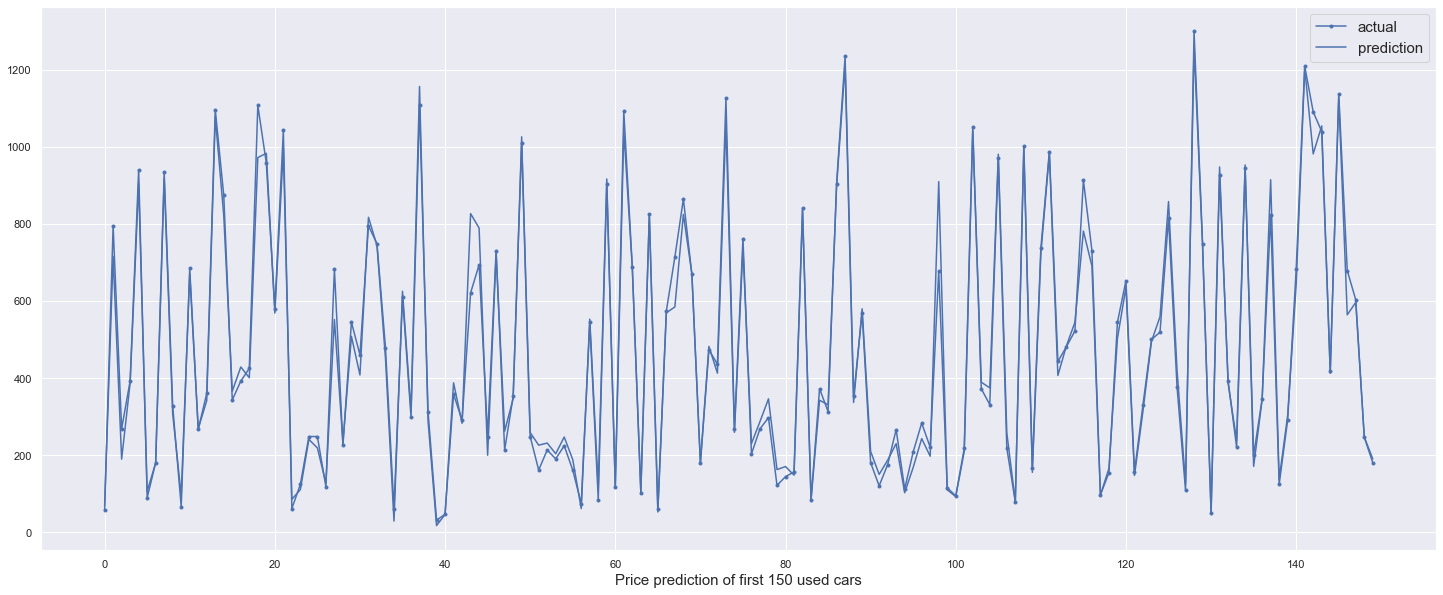

In [99]:
Graph_prediction(150, y_actual, y_predicted)

In [100]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(20)

<ipython-input-100-dac343f3e1e8>:1: RuntimeWarning:

divide by zero encountered in true_divide



,Prediction,Test Data,Abs error,AAD%
0,67.938128,56,11.938128,21.318085
1,715.911137,795,79.088863,9.948285
2,189.384956,268,78.615044,29.333972
3,387.078123,393,5.921877,1.506839
4,905.717063,941,35.282937,3.749515
5,105.446731,89,16.446731,18.479473
6,180.134429,180,0.134429,0.074683
7,918.590269,934,15.409731,1.649864
8,306.470003,327,20.529997,6.278286
9,94.511968,66,28.511968,43.199952


In [101]:
# model = GradientBoostingRegressor(random_state=21, n_estimators=5000)
feature1 = ['Make', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']

X0 = df_test[feature1]
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
model.fit(X_train,y_train)
y_predicted = model.predict(X0)

submission = pd.DataFrame({'Car_id':test.index,'Price':y_predicted}) 
submission.head(10)

,Car_id,Price
0,0,144.76
1,1,100.06
2,2,932.17
3,3,349.06
4,4,282.20
5,5,724.87
6,6,994.53
7,7,68.63
8,8,213.01
9,9,665.75


In [102]:
filename = 'submission.csv'

submission.to_csv(filename,index=True)

print('Saved file: ' + filename)

Saved file: submission.csv
